## Final Project Submission

Please fill out:
* Student name: Sung Hoon Bae
* Student pace: Full Time
* Scheduled project review date/time: 10/20/2020 7:00 PM
* Instructor name: James Irving
* Blog post URL: https://singsang2.github.io/mod_3_project


# Introduction

There is no doubt that water is eseential part of human life. Without water, humans cannot last more than 3 days. However, not only the water is crucial in sustaining our lives, but it plays a crucial role in the following aspects of human lives:

    [1] Education accessibility
    [2] Empowerment to families to overcome poverty
    [3] Higher quality of lives
    
Unfortunately, there are many people in the world who still do not have access to clean water, and, in fact, more than half of the population of Tanzania do not have an easy access to water source. 

Thankfully, there have been many volunteers and organizations who made movements to correct this and have made a huge different over the years as shown below.

<img src='img/cum_num_wells.png'>

As you can see from the figure above, there are more than 50,000 water wells installed since 1960. However there is a problem. We notice that more than 40% of the wells installed are either broken or need repair. However, it can be very difficult to determine which wells need repairs due to lack of well-organized managements.


## Goals and Objectives

The main goal of this project is to construct a model that can

    [1] classify functionality of a well based on its data correctly and
    
    [2] provide meaningtul features that affect the functionality of a well.
    
Even though the main metric we will focus on will be the recall for (1) non-functioning and (2) need repairing wells, but we will also construct that results in best accuracy as well for the sake of the competition.


## Data


The data that was used to train our models was provided by Taarifa and the Tanzanian Ministry of Water. You may also able to download the datasets from https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/. 


## Useful Functions

Useful codes can be found in `src/useful_codes.py` in the repo.

In [1]:
import src.useful_codes as uc

In /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/envs/learn-env

# EDA

Each column was examined individually to determine which columns to drop and how to approach each column for cleaning up in `Exploatory Note.ipynb` in the repo.

In [2]:
# Import necessary libraries needed to EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning) 
plt.style.use('seaborn-darkgrid')

In [244]:
# Importing Dataset
def import_data():
    X = pd.read_csv('datasets/Tanzanian/training_set.csv')
    y = pd.read_csv('datasets/Tanzanian/train_result.csv')
    
    y.drop(columns='id', axis=1, inplace=True)
    df = pd.concat([X, y], axis=1)
    return df
df = import_data()


## Data Cleanup


<AxesSubplot:>

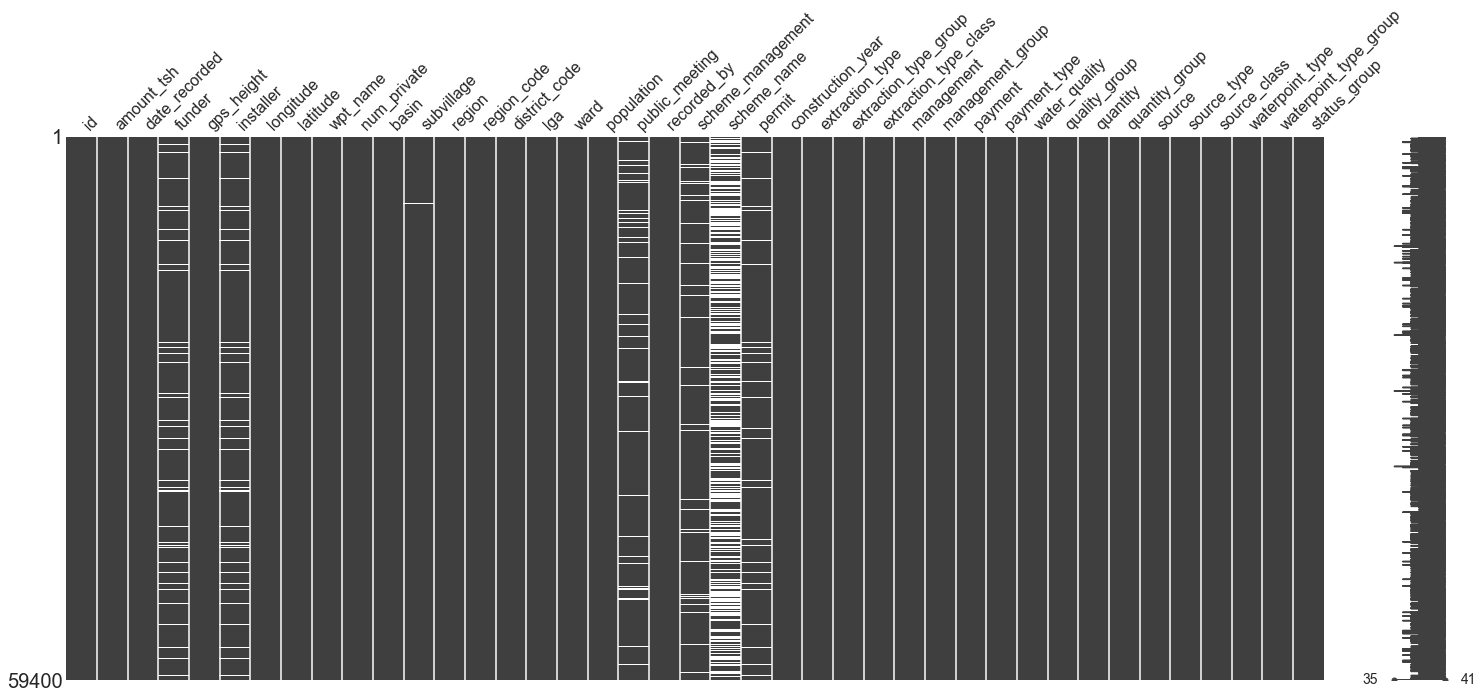

In [245]:
# Checking out if there are any notable patterns in missing value
import missingno as ms
ms.matrix(df)

- We can see that installer and funder columns have similar missing rows.
- We see that scheme_name column is something we should just delete

### Columns to drop

In [246]:
# After exploring each column see 'Explatory Note.ipynb' for detail, the following columns will be deleted.
cols_to_drop = ['id',
 'amount_tsh',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'recorded_by',
 'extraction_type_group',
 'extraction_type_class',
 'payment',
 'water_quality',
 'source_type',
 'quantity_group',
 'waterpoint_type',
 'scheme_name']

In [247]:
df.drop(columns=cols_to_drop, inplace=True)

### Datetime data

In [248]:
# converts date_recorded into datetime format
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
df['year_recorded'] = df['date_recorded'].apply(lambda x: x.year)
df['month_recorded'] = df['date_recorded'].apply(lambda x: x.month)
df.drop(columns=['date_recorded'], axis=1, inplace=True)

### wpt_name into a boolean column

In [290]:
# 1 if a name exists and 0 if not.
df['wpt_name'] = (df['wpt_name']!='none').astype(int)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [15]:
df.isna().sum()

funder                   1176
gps_height                  0
installer                1186
longitude                   0
latitude                    0
wpt_name                    0
region_code                 0
district_code               0
population                  0
public_meeting              0
scheme_management        3440
permit                      0
construction_year           0
extraction_type             0
management                  0
management_group            0
payment_type                0
quality_group               0
quantity                    0
source                      0
source_class                0
waterpoint_type_group       0
status_group                0
year_recorded               0
month_recorded              0
dtype: int64

## Dropping missing rows

In [251]:
df = drop_rows_na(df, 'public_meeting')
df = drop_rows_na(df, 'permit')

<AxesSubplot:>

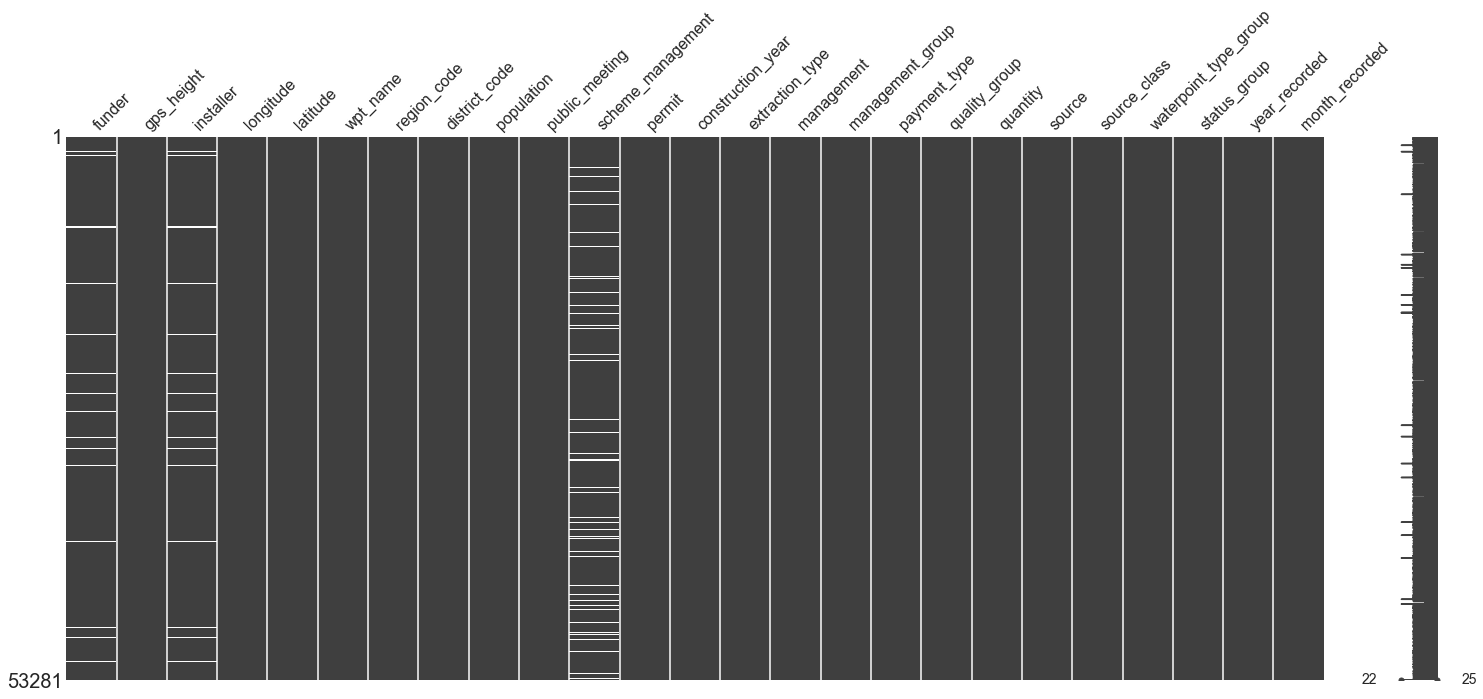

In [252]:
# missing values
ms.matrix(df)

In [253]:
uc.get_percent_retained(df)

Original Length: 59400
Current Length: 53281
Percent Retained: 89.7%


## Cat vs Num columns

In [254]:
# Categorical Columns
cat_cols = df.drop(columns='status_group', axis=1).select_dtypes('O').columns
# Numerical Columsn
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [255]:
cat_cols = list(cat_cols)
num_cols = list(num_cols)

## Correlation between numerical columns

<AxesSubplot:>

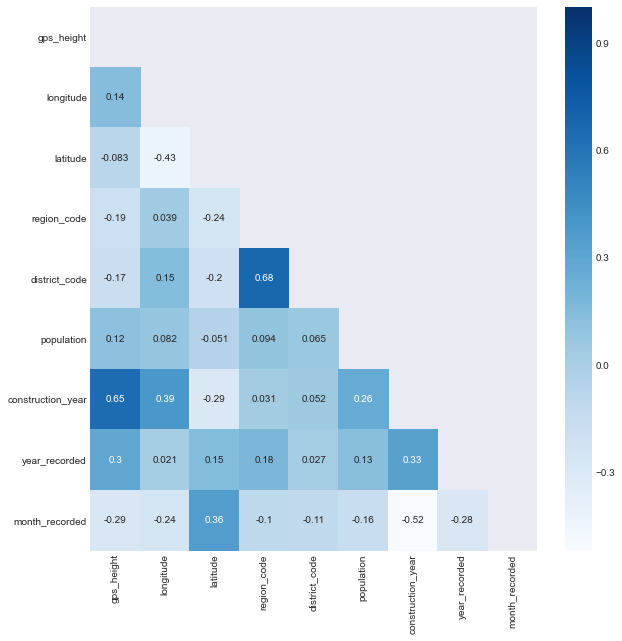

In [257]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), cmap='Blues', mask=mask, annot=True)

> Observation:
    - High correlation between region code and district code which makes sense.
    - High correlation between construction year and height. Perhaps this means that as the time went by people were able to make wells in higher altitudes.

# Vanilla Models

## Splitting Data

In [258]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [259]:
X = df.drop(columns=['status_group'], axis=1)
y = df['status_group']

In [260]:
# Transforms y into 0, 1, 2
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

# 0 = func, 1 = repair, 2 = non_func wells
pd.Series(y).value_counts(1)

0    0.545504
2    0.381919
1    0.072577
dtype: float64

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)

## Setting pipeline

In [262]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import set_config
set_config(display='diagram')

In [263]:
# Creates pipeline for dealing with num and cat columns
pipe_cat = Pipeline(steps=[('imp', SimpleImputer(strategy='constant', fill_value='MISSING')),
                           ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

pipe_num = Pipeline(steps=[('imp', SimpleImputer(missing_values=0, strategy='median')),
                           ('scale', StandardScaler())])

In [264]:
# Combines the two pipelines above into one
preprocessing = ColumnTransformer(transformers=[
    ('cat', pipe_cat, cat_cols),
    ('num', pipe_num, num_cols)
])
preprocessing

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['funder', 'installer', 'wpt_name',
                                  'public_meeting', 'scheme_management',
                                  'permit', 'extraction_type', 'management',
                                  'management_group', 'payment_type',
                                  'quality_group', 'quantity', 'source',
                                  'source_class', 'waterpoint_type_group']),
                                ('num',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(missing_values=0,
                                                                strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['gps_height', 'longitude', 'latitude',
                                  'region_code', 'district_code', 'population',
                                  'construction_year', 'year_recorded',
                                  'month_recorded'])])

In [265]:
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)

In [266]:
feature_names = preprocessing.named_transformers_['cat'].\
                named_steps['encoder'].get_feature_names(cat_cols).tolist()
feature_names

features = feature_names+num_cols

In [267]:
X_train_tf = pd.DataFrame(X_train_tf, columns = features)
X_test_tf = pd.DataFrame(X_test_tf, columns = features)

## Round 1 models

In [268]:
# imports all the libraries needed to model
import sklearn.svm as svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Since there are a large number of columns, we will just use two simple models to see how they are doing before we dive into further data cleaning and feature engineering.

### Random Tree Model

In [270]:
rf = RandomForestClassifier()
rf.fit(X_train_tf, y_train)

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
Train Accuracy :  0.9981
Test Accuracy :  0.7885
Train AUC :  0.9999
Test AUC :  0.8867
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     17455
           1       0.46      0.30      0.36      2315
           2       0.82      0.76      0.79     12199

    accuracy                           0.79     31969
   macro avg       0.69      0.64      0.66     31969
weighted avg       0.78      0.79      0.78     31969

------------------------------------------------------------




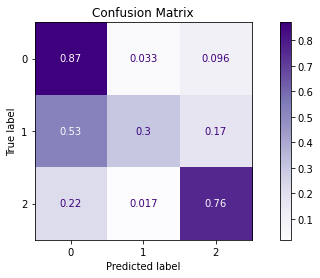

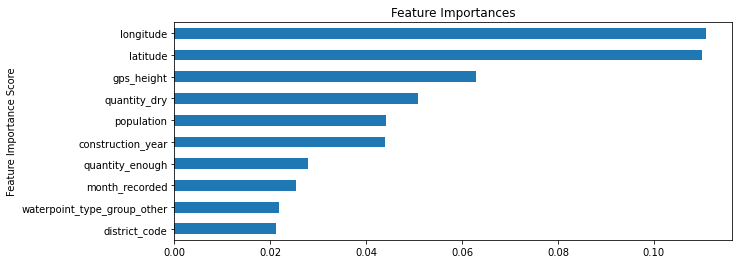

In [38]:
evaluate_clf_model(rf, X_train_tf, y_train, X_test_tf, y_test);

### Decision Tree

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
Train Accuracy :  0.9982
Test Accuracy :  0.7408
Train AUC :  1.0
Test AUC :  0.7695
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     17455
           1       0.34      0.33      0.33      2315
           2       0.75      0.74      0.75     12199

    accuracy                           0.74     31969
   macro avg       0.62      0.62      0.62     31969
weighted avg       0.74      0.74      0.74     31969

------------------------------------------------------------




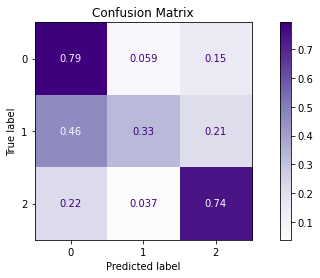

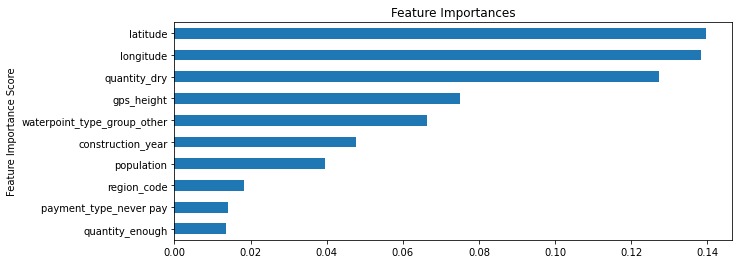

In [39]:
tree = DecisionTreeClassifier()
tree.fit(X_train_tf, y_train)

evaluate_clf_model(tree, X_train_tf, y_train, X_test_tf, y_test);

## Conclusion: Round 1 models

- Need to deal with class imbalance
    - Method 1: Use SMOTE or SMOTENC to oversample
    - Method 2: Undersample
    - Method 3: Use class_weight parameter to give penalties to the class with higher number of samples

- We will try method 1 and method 3 for the next round

- We will need to feature engineer new features!
  

# Models Round 2: Creating First Layer Models

## Feature Engineering and Cleaning

### Dropping Different Additional Columns

In [278]:
cols_to_drop=['amount_tsh',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'recorded_by',
 'extraction_type_group',
 'extraction_type_class',
 'water_quality',
 'source_type',
 'quantity_group',
 'waterpoint_type',
 'scheme_name',
 'payment',
 'management_group',
 'region_code',
 'district_code',
 'source',
 'id']

In [281]:
# Import Data
file1='datasets/Tanzanian/training_set.csv'
file2='datasets/Tanzanian/train_result.csv'
df = uc.import_data(file1, file2, cols_to_drop)

X = df.drop(columns='status_group', axis=1)
y = df[['status_group']]

/Users/juhyunlee/Documents/GitHub/dsc-mod-3-project-v2-1-onl01-dtsc-ft-070620/src/useful_codes.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['construction_year'][mask] = X['year_recorded'][mask]


Original Length: 59400
Current Length: 51827
Percent Retained: 87.25%


### Feature #1: percent nearby within 30km radius

As for first of new feature, we will add 

    [1] percent of functioning wells near 30 km radius
    [2] percent of non-functioning wells near 30 km radius and 
    [3] percent of functioning but needs repair wells near 30 km radius.


In [282]:
# Calculates percentage of functional, nonfunctional, and need repair wells within certain radius (30 km)
# WARNING! This takes about 16minutes to run!
df = uc.get_nearby(df, r=30)

In [284]:
df.head()

,funder,gps_height,installer,longitude,latitude,wpt_name,population,public_meeting,scheme_management,permit,...,quality_group,quantity,source_class,waterpoint_type_group,year_recorded,month_recorded,status_group,perc_func_nearby,perc_non_func_nearby,perc_repair_nearby
0,Roman,1390,Roman,34.938093,-9.856322,False,109,True,VWC,False,...,good,enough,groundwater,communal standpipe,2011,3,functional,78.45,18.97,2.59
1,Lottery Club,686,World vision,37.460664,-3.821329,True,250,True,VWC,True,...,good,enough,surface,communal standpipe,2013,2,functional,51.54,40.38,8.08
2,Unicef,263,UNICEF,38.486161,-11.155298,True,58,True,VWC,True,...,good,dry,groundwater,communal standpipe,2013,1,non functional,30.34,69.66,0.00
3,Action In A,0,Artisan,31.130847,-1.825359,True,0,True,NaN,True,...,good,seasonal,surface,communal standpipe,2011,7,functional,59.85,34.75,5.41
4,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,True,1,True,VWC,True,...,salty,enough,unknown,communal standpipe,2011,3,functional,65.22,34.78,0.00


### Feature #2: Extraction Type

Based on our observations, it seemed like many of extraction types could be simplified into 'other' group. So minority types (anything that has <1%) will be counted as 'other' extraction type.

In [285]:
# replaces insignificant extractor types as 'other'
df = uc.extraction(df)

### Feature #3: installer and funder

There are way too many unique values for installer and funder. We could try to do two different approach for this:

    [1] Label encode - giving each category a value making it into a numerical column instead of one-hot-encoding.
    [2] Something different.

We will try to do something different for fun. We will see calculate

    [1] percent functioning wells.
    [2] percent non functioning wells.
    [3] percent needing repair wells.

for each funder and installer.

In [66]:
# makes a dictionary that has percent func/non func/repair for each installer
def get_percent(data = df, col='installer', drop=True):
    if col in data.keys():
        # copies the column
        sample = data[[col, 'status_group']].copy()

        # Get dummies for the column
        sample_dummies = pd.get_dummies(sample, columns=['status_group'])

        # Sum total functioning, nonfunctioning, and needing repair wells for each group
        a = sample_dummies.groupby(col).sum()

        a['total'] = a.sum(axis=1)

        # Get percentages
        a['perc_func'] = a['status_group_functional']/a['total']
        a['perc_repair'] = a['status_group_functional needs repair']/a['total']
        a['perc_non_func'] = a['status_group_non functional']/a['total']

        a = a[['perc_func', 'perc_repair', 'perc_non_func']].reset_index()
        
        perc_dict = {}
        for index, row in a.iterrows():
            perc_dict[row[col]] = [row['perc_func'], row['perc_repair'], row['perc_non_func']]

        data[f'{col}_perc_func'] = data[col].apply(lambda x: perc_dict[x][0] if x in perc_dict.keys() else np.NaN)
        data[f'{col}_perc_repair'] = data[col].apply(lambda x: perc_dict[x][1] if x in perc_dict.keys() else np.NaN)
        data[f'{col}_perc_non_func'] = data[col].apply(lambda x: perc_dict[x][2] if x in perc_dict.keys() else np.NaN)
        
        if drop:
            data.drop(columns=[col], axis=1, inplace=True)
    else:
        print(f'Column name {col} not found.')
    
    return perc_dict

In [287]:
# Gets percetnages for different installers
installer_dict = uc.get_percent(df, col='installer')

# Gets percetnages for different funders
funder_dict = uc.get_percent(df, col='funder')

In [289]:
# # Saves the data for future use
uc.save_data(installer_dict, 'files/installer_dict')
uc.save_data(funder_dict, 'files/funder_dict')

# # Loads the data
# installer_dict = uc.load('files/installer_dict')
# funder_dict = uc.load('files/funder_dict')

### Feature Selections

In [3]:
# Saving dataframe until now
# save_data(df, 'files/final_df')
# loading datafrom for model #2
df = uc.load_data('files/final_df')

<AxesSubplot:>

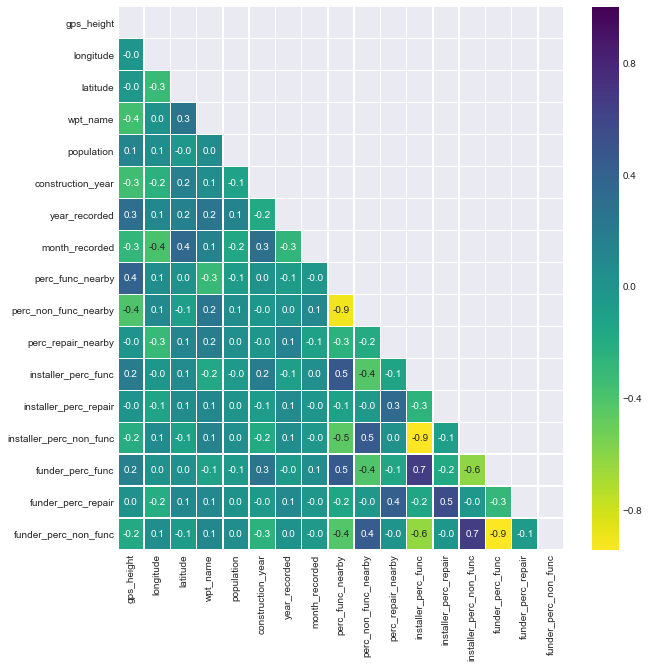

In [4]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), cmap='viridis_r', mask=mask, annot=True, linewidths=0.5, fmt='.1f')

> As you can see above, percent func and percent non_func are highly correlated. We will just use percent functioning for our models.

In [5]:
# Three features that will be eliminated from the data
drop_features = ['funder_perc_non_func', 'installer_perc_non_func', 'perc_non_func_nearby']
df_1 = df.drop(columns=drop_features, axis=1).copy()

<AxesSubplot:>

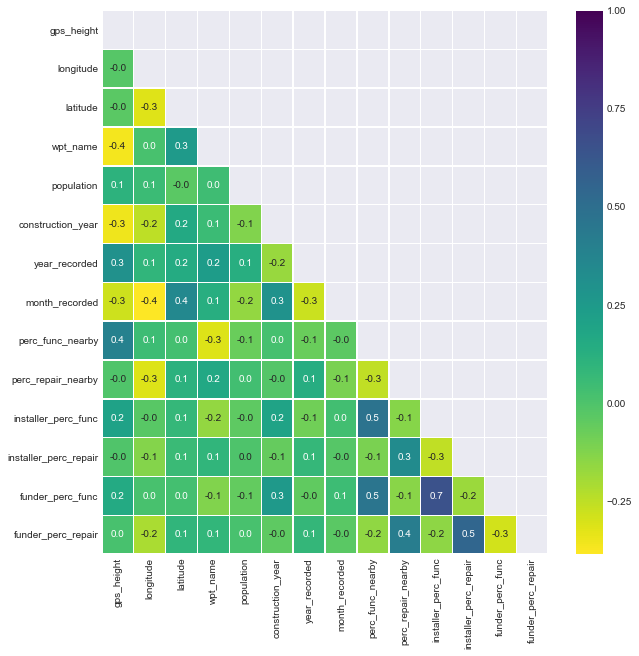

In [6]:
mask = np.zeros_like(df_1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_1.corr(), cmap='viridis_r', mask=mask, annot=True, linewidths=0.5, fmt='.1f')

Now, we will check whether we have seleceted the right features.

## Preprocessing

In [9]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf, features, cat_cols, num_cols = uc.preprocess(df)

### Dealing with class imbalance: SMOTE

In order to respond to class imbalance, SMOTE will be implemented which over samples under-represented classes by generating data based on known data.

In [10]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from imblearn.over_sampling import SMOTE

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
pd.Series(y_train_tf).value_counts(normalize=True)

0    0.550223
2    0.381388
1    0.068389
dtype: float64

In [12]:
X_train_smote_tf, y_train_smote_tf = SMOTE().fit_resample(X_train_tf, y_train_tf)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
pd.Series(y_train_smote_tf).value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
dtype: float64

In [14]:
X_train_smote_tf = pd.DataFrame(X_train_smote_tf, columns = X_train_tf.columns)
X_train_smote_tf

,gps_height,longitude,latitude,population,construction_year,year_recorded,month_recorded,perc_func_nearby,perc_non_func_nearby,perc_repair_nearby,...,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,wpt_name_False,wpt_name_True
0,0.618182,0.454127,0.181124,0.007516,0.603774,0.818182,0.181818,0.842800,0.135600,0.043200,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.706643,0.190035,0.332080,0.032680,0.452830,1.000000,0.000000,0.436700,0.540000,0.046600,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.502797,0.421261,0.820820,0.032680,0.773585,1.000000,0.090909,0.621700,0.166700,0.423200,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.401399,0.705194,0.784964,0.001307,0.735849,1.000000,0.454545,0.746200,0.214300,0.079000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.031469,0.269414,0.241125,0.000000,0.962264,0.818182,0.545455,0.415300,0.550800,0.067800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59878,0.653643,0.464238,0.964586,0.011913,0.729158,0.909091,0.818182,0.665923,0.334077,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
59879,0.499036,0.092003,0.749156,0.028216,0.622642,1.000000,0.090909,0.538972,0.379397,0.163376,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
59880,0.083930,0.902957,0.056979,0.000065,0.478205,1.000000,0.090909,0.274775,0.597879,0.254691,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
59881,0.149401,0.859469,0.418708,0.024353,0.721491,0.818182,0.090909,0.347056,0.643740,0.018410,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


> Not all models will implement SMOTE.

### Dealing with class imbalance: Class weight

Another way to deal with class imbalance is to use class_weight. There are two different ways to use class weight.

    [1]. Array form - an array of class weights 
    [2]. Dictionary form - a dictionary with class label along with corresponding class weight values.
    
Class weight values will be calculated using sklearn.utils.class_weight

In [17]:
# get class weight and dictionary version of it
class_weight, class_weight_dict = uc.get_class_weights(y_train_tf)

In [19]:
class_weight_dict

{0: 0.6058146719436234, 1: 4.874109901921268, 2: 0.8740001927339308}

## Modeling

We will create vanilla models again with dataset with newly engineered features to see whether these new features have helped the model.

### Random Forest

------------------------------------------------------------
[i] CLASSIFICATION REPORT Random Forest Vanilla
------------------------------------------------------------
Train Accuracy :  0.9999
Test Accuracy :  0.8076
Train AUC :  1.0
Test AUC :  0.9088
------------------------------------------------------------

                precision    recall  f1-score   support

   functioning       0.81      0.88      0.85      8490
  needs repair       0.48      0.32      0.38      1019
nonfunctioning       0.84      0.79      0.81      6040

      accuracy                           0.81     15549
     macro avg       0.71      0.66      0.68     15549
  weighted avg       0.80      0.81      0.80     15549

------------------------------------------------------------




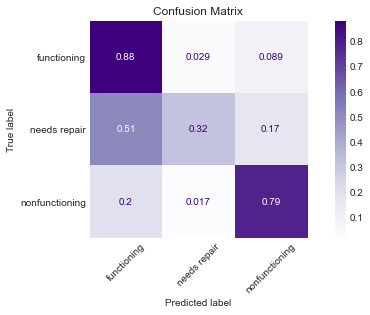

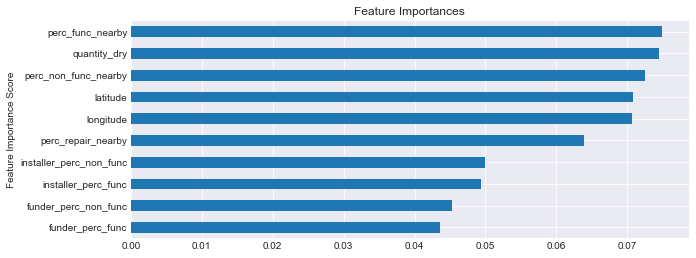

In [32]:
# Vanilla RF
rf = RandomForestClassifier()
rf.fit(X_train_tf, y_train_tf)
uc.evaluate_clf_model(rf, X_train_tf, y_train_tf, X_test_tf, y_test_tf,
                      label='Random Forest Vanilla');

In [33]:
# Hypertuning RF
RF = RandomForestClassifier(criterion='gini',
                            n_estimators=1000,
                            class_weight=class_weight_dict,
                            max_depth = 15,
                            min_samples_split=0.001,
                            max_features='sqrt')
RF.fit(X_train_tf, y_train_tf)

RandomForestClassifier(class_weight={0: 0.6058146719436234,
                                     1: 4.874109901921268,
                                     2: 0.8740001927339308},
                       max_depth=15, max_features='sqrt',
                       min_samples_split=0.001, n_estimators=1000)

------------------------------------------------------------
[i] CLASSIFICATION REPORT Random Forest Tuned
------------------------------------------------------------
Train Accuracy :  0.7754
Test Accuracy :  0.737
Train AUC :  0.9224
Test AUC :  0.8915
------------------------------------------------------------

                precision    recall  f1-score   support

   functioning       0.85      0.74      0.79      8490
  needs repair       0.27      0.72      0.39      1019
nonfunctioning       0.82      0.74      0.78      6040

      accuracy                           0.74     15549
     macro avg       0.65      0.73      0.65     15549
  weighted avg       0.80      0.74      0.76     15549

------------------------------------------------------------




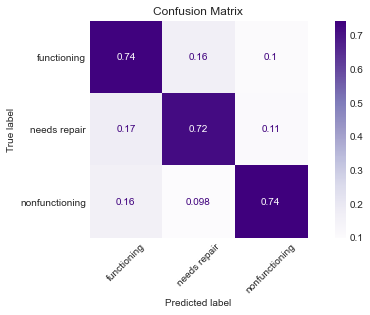

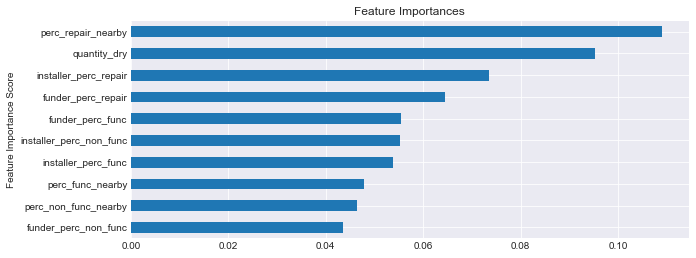

In [35]:
uc.evaluate_clf_model(RF, X_train_tf, y_train_tf, X_test_tf, y_test_tf,
                   label='Random Forest Tuned');

> Random Forest Evaluation
    - Close train and test sets show us that the model is not over fit.
    - Relatively high AUC for both train and test datasets.
    - various percerntages of functionalities of wells affected the model the most.
    - Relatively balanced recalls for all three categories
   

### Logistic Regression

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


------------------------------------------------------------
[i] CLASSIFICATION REPORT Logistic Regression Vanilla
------------------------------------------------------------
Train Accuracy :  0.7615
Test Accuracy :  0.7667
Train AUC :  0.8666
Test AUC :  0.8691
------------------------------------------------------------

                precision    recall  f1-score   support

   functioning       0.76      0.89      0.82      8490
  needs repair       0.48      0.18      0.27      1019
nonfunctioning       0.80      0.69      0.74      6040

      accuracy                           0.77     15549
     macro avg       0.68      0.59      0.61     15549
  weighted avg       0.76      0.77      0.75     15549

------------------------------------------------------------




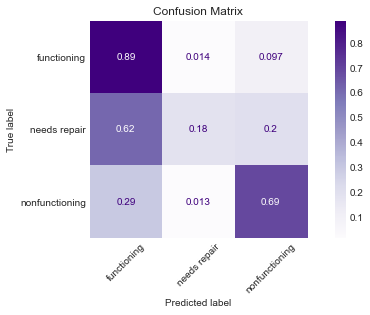

In [40]:
# Vanilla Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tf, y_train_tf)
uc.evaluate_clf_model(lr, X_train_tf, y_train_tf, X_test_tf, y_test_tf,
                   label='Logistic Regression Vanilla',
                   feature_importance=False);

In [62]:
# Tuned LR
LR = LogisticRegression(C=0.8,
                        random_state = 0, 
                        max_iter = 1000)
LR.fit(X_train_tf, y_train_tf)

LogisticRegression(C=0.8, max_iter=1000, random_state=0)

------------------------------------------------------------
[i] CLASSIFICATION REPORT Logistic Regression Tuned
------------------------------------------------------------
Train Accuracy :  0.7615
Test Accuracy :  0.7671
Train AUC :  0.8666
Test AUC :  0.8691
------------------------------------------------------------

                precision    recall  f1-score   support

   functioning       0.76      0.89      0.82      8490
  needs repair       0.48      0.18      0.26      1019
nonfunctioning       0.80      0.69      0.74      6040

      accuracy                           0.77     15549
     macro avg       0.68      0.59      0.61     15549
  weighted avg       0.76      0.77      0.75     15549

------------------------------------------------------------




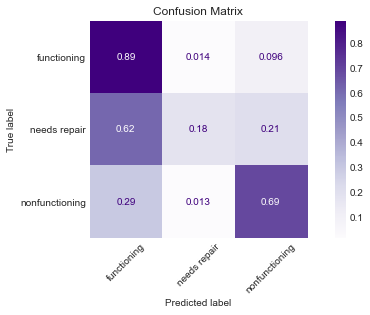

In [63]:
uc.evaluate_clf_model(LR, X_train_tf, y_train_tf, X_test_tf, y_test_tf,
                      label='Logistic Regression Tuned',
                       feature_importance=False);

> Logistic Regression Evaluation
    - Close train and test sets show us that the model is not over fit.
    - Relatively high AUC for both train and test datasets.
    - Low recall for need repairing class
   

### XGBoost

In [65]:
# Vanilla XGBoost model
xgb = XGBClassifier()

xgb.fit(X_train_tf, y_train_tf)

XGBClassifier(objective='multi:softprob')

------------------------------------------------------------
[i] CLASSIFICATION REPORT XGB vanilla
------------------------------------------------------------
Train Accuracy :  0.7693
Test Accuracy :  0.7714
Train AUC :  0.8792
Test AUC :  0.8791
------------------------------------------------------------

                precision    recall  f1-score   support

   functioning       0.75      0.91      0.82      8490
  needs repair       0.55      0.13      0.22      1019
nonfunctioning       0.83      0.68      0.75      6040

      accuracy                           0.77     15549
     macro avg       0.71      0.58      0.60     15549
  weighted avg       0.77      0.77      0.75     15549

------------------------------------------------------------




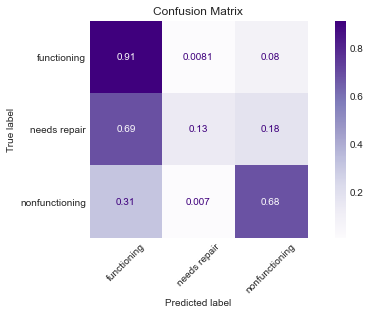

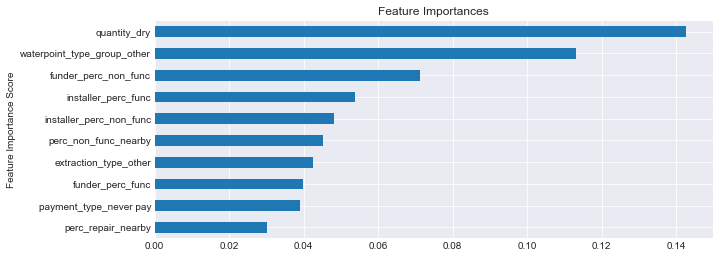

In [68]:
uc.evaluate_clf_model(xgb, X_train_tf, y_train_tf, X_test_tf, y_test_tf,
                     label='XGB vanilla');

In [72]:
# Tuned XGBoost model
XGB = XGBClassifier(objective='mutli:softmax', num_class=3, 
                    class_weight=class_weight_dict,
                    n_estimators=200,
                    max_depth=5,
                    subsample=0.6,
                    min_child_weight=0.8)

XGB.fit(X_train_tf, y_train_tf);

------------------------------------------------------------
[i] CLASSIFICATION REPORT XGBoost Tuned
------------------------------------------------------------
Train Accuracy :  0.8209
Test Accuracy :  0.7997
Train AUC :  0.9296
Test AUC :  0.9062
------------------------------------------------------------

                precision    recall  f1-score   support

   functioning       0.78      0.92      0.84      8490
  needs repair       0.62      0.22      0.33      1019
nonfunctioning       0.85      0.73      0.79      6040

      accuracy                           0.80     15549
     macro avg       0.75      0.62      0.65     15549
  weighted avg       0.80      0.80      0.79     15549

------------------------------------------------------------




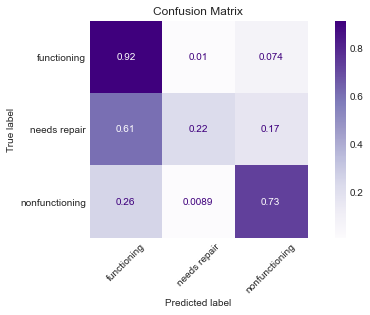

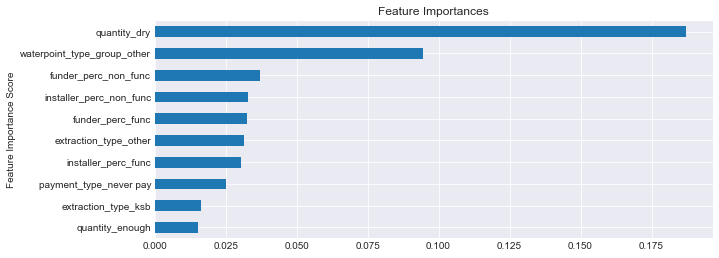

In [73]:
uc.evaluate_clf_model(XGB, X_train_tf, y_train_tf, X_test_tf, y_test_tf,
                      label='XGBoost Tuned');

> XGBoost Evaluation
    - Relatively close test and training accuracy - well-fit.
    - Relatively high AUC for both train and test datasets.
    - Quantity of water well was the highest affector.
    - High recall for functioning wells and low recall for needing repair wells. class_weight did help a little.
   

### AdaBoosting

------------------------------------------------------------
[i] CLASSIFICATION REPORT AdaBoosting Vanilla
------------------------------------------------------------
Train Accuracy :  0.7471
Test Accuracy :  0.7524
Train AUC :  0.7148
Test AUC :  0.7161
------------------------------------------------------------

                precision    recall  f1-score   support

   functioning       0.74      0.90      0.81      8490
  needs repair       0.46      0.13      0.21      1019
nonfunctioning       0.80      0.65      0.72      6040

      accuracy                           0.75     15549
     macro avg       0.67      0.56      0.58     15549
  weighted avg       0.74      0.75      0.73     15549

------------------------------------------------------------




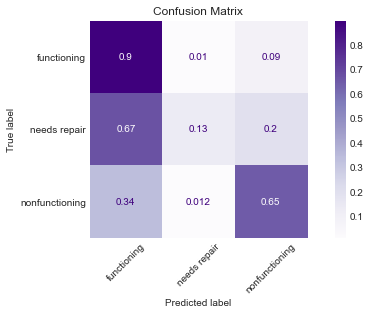

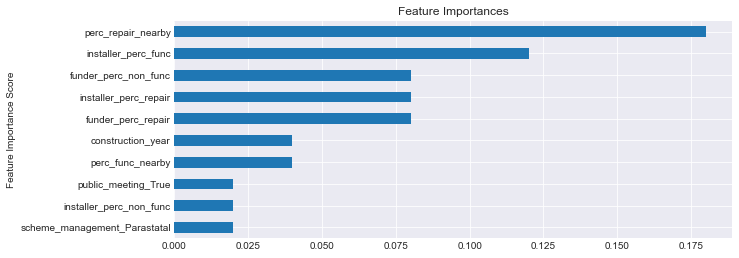

In [70]:
# Vanilla AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_train_tf, y_train_tf)
uc.evaluate_clf_model(ab, X_train_tf, y_train_tf, X_test_tf, y_test_tf,
                      label='AdaBoosting Vanilla');

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
Train Accuracy :  0.7621
Test Accuracy :  0.7637
Train AUC :  0.7621
Test AUC :  0.7591
------------------------------------------------------------

                precision    recall  f1-score   support

   functioning       0.75      0.90      0.82      8490
  needs repair       0.50      0.20      0.29      1019
nonfunctioning       0.81      0.67      0.73      6040

      accuracy                           0.76     15549
     macro avg       0.69      0.59      0.61     15549
  weighted avg       0.76      0.76      0.75     15549

------------------------------------------------------------




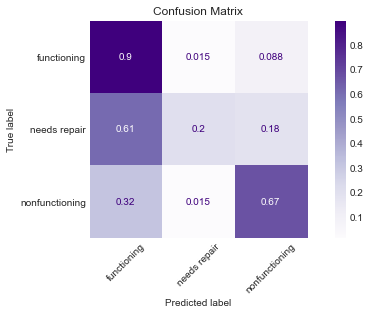

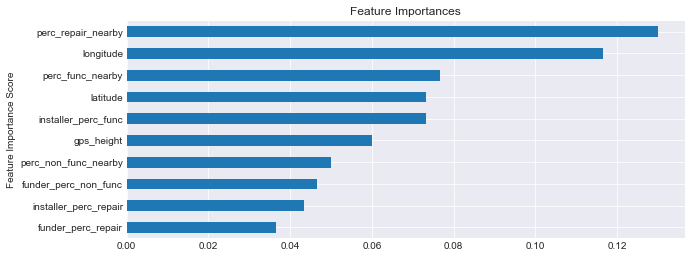

In [74]:
# Tuned AdaBoosting
AB = AdaBoostClassifier(n_estimators=300)
AB.fit(X_train_tf, y_train_tf)
uc.evaluate_clf_model(AB, X_train_tf, y_train_tf, X_test_tf, y_test_tf);

> Adaboost Evaluation
    - Close train and test sets show us that the model is not over fit.
    - various percentages of functionalities of wells affected the model the most.
    - Low recalls - highly biased
   

### Extra Trees

------------------------------------------------------------
[i] CLASSIFICATION REPORT Extra Trees Vanilla
------------------------------------------------------------
Train Accuracy :  1.0
Test Accuracy :  0.7992
Train AUC :  1.0
Test AUC :  0.8977
------------------------------------------------------------

                precision    recall  f1-score   support

   functioning       0.82      0.86      0.84      8490
  needs repair       0.45      0.36      0.40      1019
nonfunctioning       0.82      0.79      0.80      6040

      accuracy                           0.80     15549
     macro avg       0.70      0.67      0.68     15549
  weighted avg       0.79      0.80      0.80     15549

------------------------------------------------------------




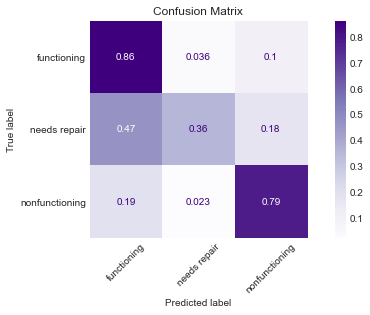

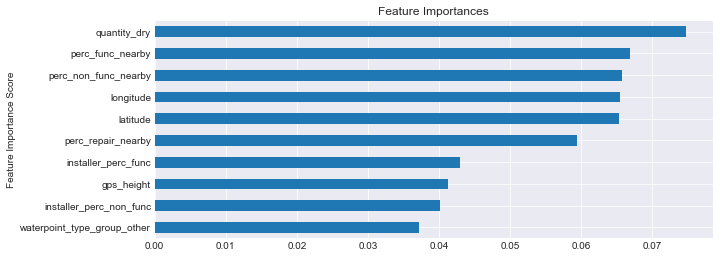

In [75]:
# Vanilla Extra Trees
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(X_train_tf, y_train_tf)
uc.evaluate_clf_model(et, X_train_tf, y_train_tf, X_test_tf, y_test_tf,
                      label='Extra Trees Vanilla');

In [76]:
# Tuned Extra Trees
ET = ExtraTreesClassifier(n_estimators=200,
                          class_weight=class_weight_dict,
                          max_features=0.7,
                          min_samples_split=0.01)

ET.fit(X_train_tf, y_train_tf)

ExtraTreesClassifier(class_weight={0: 0.6058146719436234, 1: 4.874109901921268,
                                   2: 0.8740001927339308},
                     max_features=0.7, min_samples_split=0.01,
                     n_estimators=200)

------------------------------------------------------------
[i] CLASSIFICATION REPORT Extra Trees Tuned
------------------------------------------------------------
Train Accuracy :  0.7038
Test Accuracy :  0.6923
Train AUC :  0.885
Test AUC :  0.8766
------------------------------------------------------------

                precision    recall  f1-score   support

   functioning       0.83      0.69      0.76      8490
  needs repair       0.22      0.76      0.35      1019
nonfunctioning       0.82      0.68      0.74      6040

      accuracy                           0.69     15549
     macro avg       0.63      0.71      0.62     15549
  weighted avg       0.79      0.69      0.72     15549

------------------------------------------------------------




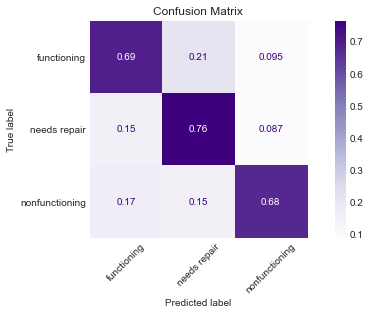

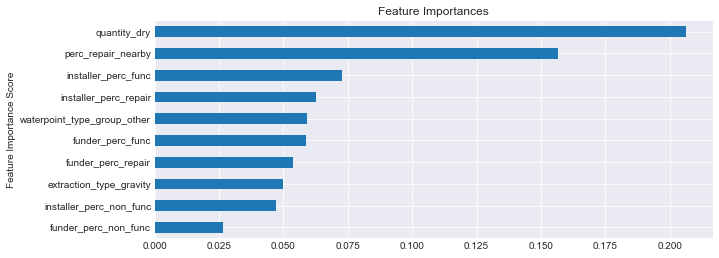

In [77]:
uc.evaluate_clf_model(ET, X_train_tf, y_train_tf, X_test_tf, y_test_tf,
                      label='Extra Trees Tuned');

> Extra Trees Evaluation
    - Close train and test sets show us that the model is not over fit.
    - various percentages of functionalities of wells affected the model the most + quantity.
    - Good repair recalls but lowered recalls for functioning.

### Gradient Boosting

------------------------------------------------------------
[i] CLASSIFICATION REPORT Gradient Boosting Vanilla
------------------------------------------------------------
Train Accuracy :  0.7804
Test Accuracy :  0.7781
Train AUC :  0.8876
Test AUC :  0.8854
------------------------------------------------------------

                precision    recall  f1-score   support

   functioning       0.76      0.91      0.83      8490
  needs repair       0.56      0.18      0.28      1019
nonfunctioning       0.83      0.70      0.76      6040

      accuracy                           0.78     15549
     macro avg       0.72      0.60      0.62     15549
  weighted avg       0.77      0.78      0.76     15549

------------------------------------------------------------




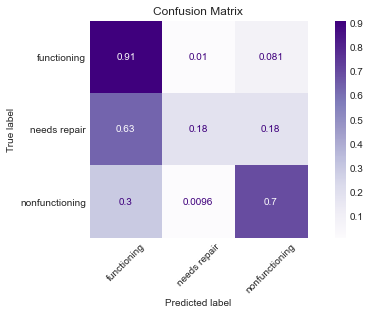

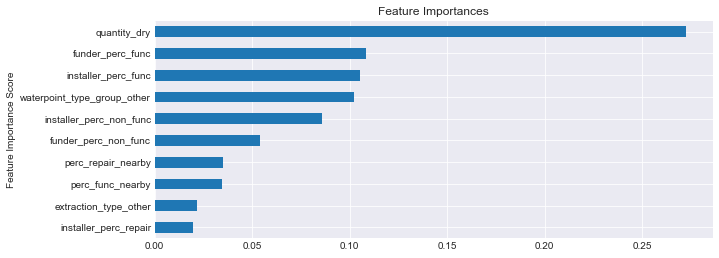

In [78]:
# Vanilla Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train_tf, y_train_tf)
uc.evaluate_clf_model(gb, X_train_tf, y_train_tf, X_test_tf, y_test_tf,
                      label='Gradient Boosting Vanilla');


In [79]:
# Tuned Gradient Boosting
GB = GradientBoostingClassifier(n_estimators=300,
                                max_depth=7,
                                subsample=0.6)
GB.fit(X_train_tf, y_train_tf)

GradientBoostingClassifier(max_depth=7, n_estimators=300, subsample=0.6)

------------------------------------------------------------
[i] CLASSIFICATION REPORT Gradient Boosting Tuned
------------------------------------------------------------
Train Accuracy :  0.9358
Test Accuracy :  0.8115
Train AUC :  0.991
Test AUC :  0.9139
------------------------------------------------------------

                precision    recall  f1-score   support

   functioning       0.81      0.90      0.85      8490
  needs repair       0.52      0.28      0.37      1019
nonfunctioning       0.84      0.78      0.81      6040

      accuracy                           0.81     15549
     macro avg       0.72      0.65      0.68     15549
  weighted avg       0.80      0.81      0.80     15549

------------------------------------------------------------




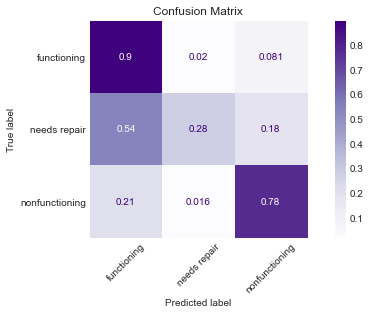

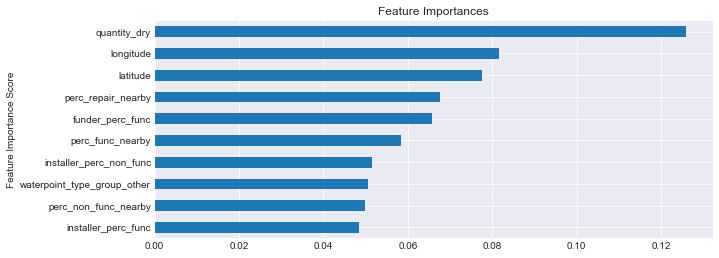

In [80]:
uc.evaluate_clf_model(GB, X_train_tf, y_train_tf, X_test_tf, y_test_tf,
                      label='Gradient Boosting Tuned');

> Gradient Boost Evaluation
    - Slightly overfit
    - Low recalls for repair- highly biased

### KNN

------------------------------------------------------------
[i] CLASSIFICATION REPORT KNN Vanilla
------------------------------------------------------------
Train Accuracy :  0.8385
Test Accuracy :  0.7824
Train AUC :  0.9479
Test AUC :  0.871
------------------------------------------------------------

                precision    recall  f1-score   support

   functioning       0.78      0.88      0.83      8490
  needs repair       0.45      0.27      0.34      1019
nonfunctioning       0.82      0.73      0.77      6040

      accuracy                           0.78     15549
     macro avg       0.69      0.63      0.65     15549
  weighted avg       0.78      0.78      0.77     15549

------------------------------------------------------------




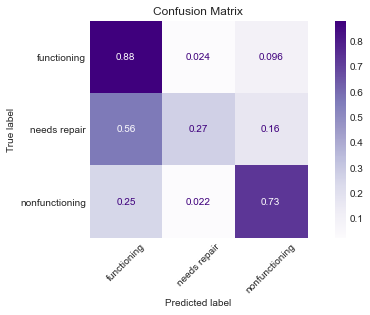

In [171]:
# Vanilla KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train_tf, y_train_tf)
uc.evaluate_clf_model(KNN, X_train_tf, y_train_tf, X_test_tf, y_test_tf,
                   label='KNN Vanilla',
                   feature_importance=False);

> KNN Evaluation
    - Close train and test sets show us that the model is not over fit.
    - Low recalls - highly biased

# Ensemble

Layer 1 Models saving

In [172]:
# Stores different models into a dictionary
model_dict = {'RF':{'model': RF}, 
              'LR':{'model': LR}, 
              'XGB':{'model': XGB}, 
              'AB':{'model': AB}, 
              'ET':{'model': ET}, 
              'GB':{'model': GB}, 
              'KNN':{'model': KNN}}

# Stores train and test predictions + result of test predictions into model dictionary
for model in model_dict:
    model_dict[model]['predict_test'] = model_dict[model]['model'].predict(X_test_tf)
    model_dict[model]['predict_train'] = model_dict[model]['model'].predict(X_train_tf)
    model_dict[model]['result_test'] = model_dict[model]['predict_test'] == y_test_tf

In [173]:
uc.save_data(model_dict, 'files/layer_1_models')

## Visualizing the benefit of ensembling models

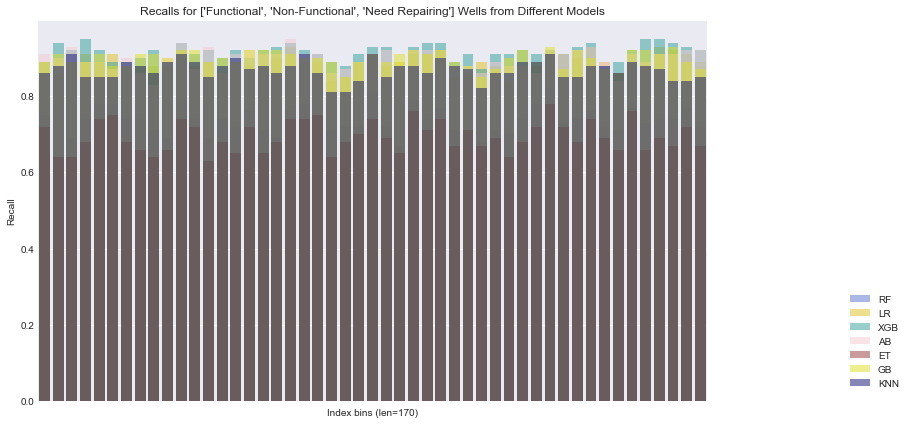

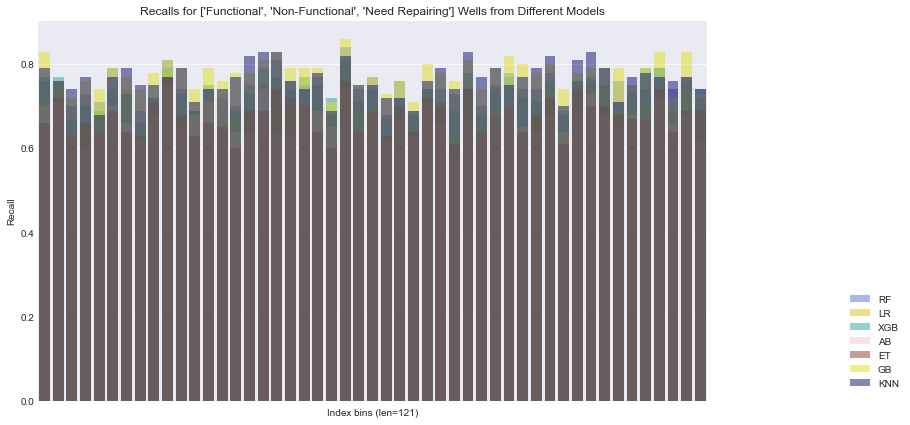

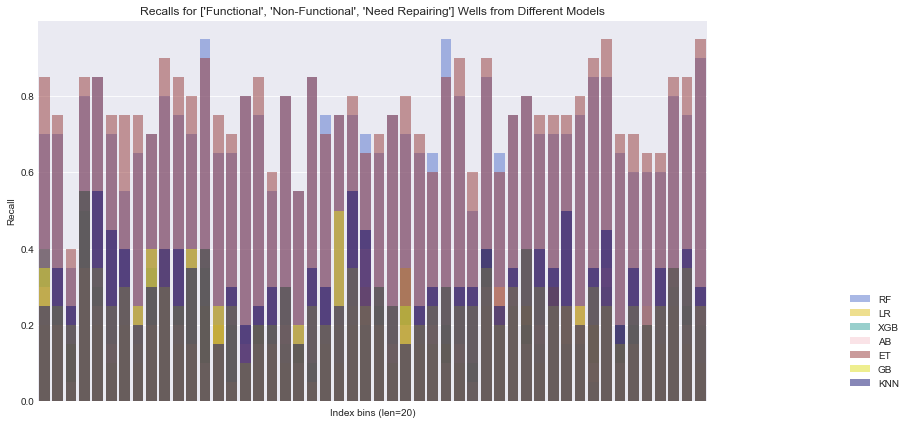

In [88]:
# Compares recall values of different models
uc.compare_recalls(model_dict, y_test_tf)

The above graph show how different models excel in different parts of test set.

    [1] Functioning Wells
        - XGB and Logistic Regression have strongest predictive force
    
    [2] Non-Functioning Wells
        - Gradient Boost has strongest predictive force
        
    [3] Need Repairing Wells
        - Overall weak for every model
        - Random Forest and Extra Trees have strongest predictive force

## Voting Classifier

As for our first meta classifier, we will implement voting classifier. Because we have such imbalance in our data and test results from different models, we will define weights for each model.

Also, since we are dealing with class imbalance, we will implement voting classifier in two different ways:

    - using class_weight
    - using SMOTE
    
in order to account for class imbalance.

In [99]:
from sklearn.metrics import recall_score

0.8054890361349103

In [101]:
# Set recall as weight for each model
for model in model_dict:
    voting_weight = recall_score(y_train_tf, model_dict[model]['predict_train'], average='macro')
    model_dict[model]['voting_weight'] = voting_weight

uc.save_data(model_dict, 'files/layer_1_models')

### Voting Classifier: class_weight

In [103]:
from sklearn.ensemble import VotingClassifier
estimators = [('rf', RandomForestClassifier(class_weight= class_weight_dict,
                                            criterion='gini',
                                            max_depth=15,
                                            max_features= 'sqrt',
                                            min_samples_split=0.001,
                                            n_estimators= 200)),
              ('lr', LogisticRegression(max_iter=1000)),
              ('et', ExtraTreesClassifier(n_estimators=200,
                                          class_weight=class_weight_dict,
                                          max_features=0.7,
                                          min_samples_split=0.01)),
              ('gb', GradientBoostingClassifier(n_estimators=300,
                                                max_depth=7,
                                                subsample=0.6)),]

vclf = VotingClassifier(estimators=estimators,
                        voting='soft',
                        weights=uc.get_voting_weight(model_dict, ['RF','LR','ET','GB']))

In [104]:
vclf.fit(X_train_tf, y_train_tf);

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight={0: 0.6058146719436234,
                                                                   1: 4.874109901921268,
                                                                   2: 0.8740001927339308},
                                                     max_depth=15,
                                                     max_features='sqrt',
                                                     min_samples_split=0.001,
                                                     n_estimators=200)),
                             ('lr', LogisticRegression(max_iter=1000)),
                             ('et',
                              ExtraTreesClassifier(class_weight={0: 0.6058146719436234,
                                                                 1: 4.874109901921268,
                                                                 2: 0.8740001927339308},
                              

------------------------------------------------------------
[i] CLASSIFICATION REPORT Voting Class
------------------------------------------------------------
Train Accuracy :  0.861
Test Accuracy :  0.7945
Train AUC :  0.9552
Test AUC :  0.9055
------------------------------------------------------------

                precision    recall  f1-score   support

   functioning       0.81      0.86      0.84      8490
  needs repair       0.41      0.47      0.44      1019
nonfunctioning       0.84      0.75      0.80      6040

      accuracy                           0.79     15549
     macro avg       0.69      0.70      0.69     15549
  weighted avg       0.80      0.79      0.80     15549

------------------------------------------------------------




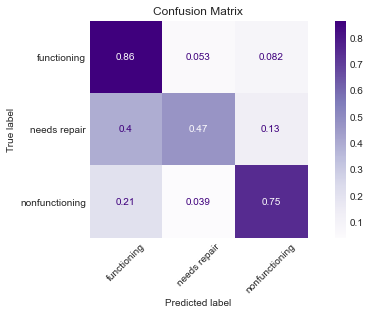

In [107]:
uc.evaluate_clf_model(vclf, X_train_tf, y_train_tf, 
                   X_test_tf, y_test_tf, 
                   label='Voting Class',
                   feature_importance=False);

> Voting Classifier Evaluation
    - Relatively high accuracy with 79% overall.
    - Low recall for repair wells - not ideal

### Voting Classifier: SMOTE

In [658]:
from sklearn.ensemble import VotingClassifier
estimators = [('rf', RandomForestClassifier(criterion='gini',
                                            max_depth=15,
                                            max_features= 'sqrt',
                                            min_samples_split=0.001,
                                            n_estimators= 200)),
              ('lr', LogisticRegression(max_iter=1000)),
              ('et', ExtraTreesClassifier(n_estimators=200,
                                          max_features=0.7,
                                          min_samples_split=0.01)),
              ('gb', GradientBoostingClassifier(n_estimators=300,
                                                max_depth=7,
                                                subsample=0.6)),]

vclf_smote = VotingClassifier(estimators=estimators,
                        voting='soft',
                        weights=uc.get_voting_weight(model_dict, ['RF','LR','ET','GB'])

In [659]:
vclf_smote.fit(X_train_smote_tf, y_train_smote_tf)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=15,
                                                     max_features='sqrt',
                                                     min_samples_split=0.001,
                                                     n_estimators=200)),
                             ('lr', LogisticRegression(max_iter=1000)),
                             ('et',
                              ExtraTreesClassifier(max_features=0.7,
                                                   min_samples_split=0.01,
                                                   n_estimators=200)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=7,
                                                         n_estimators=300,
                                                         subsample=0.6))],
                 voting='soft',
                 weights=[0.8054913227181766, 0.5871898806175465,
                          0.7440115878875867, 0.8703083495860945])

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
Train Accuracy :  0.819
Test Accuracy :  0.7675
Train AUC :  0.9422
Test AUC :  0.9013
------------------------------------------------------------

                precision    recall  f1-score   support

   functioning       0.84      0.79      0.81      8490
  needs repair       0.31      0.65      0.42      1019
nonfunctioning       0.84      0.75      0.80      6040

      accuracy                           0.77     15549
     macro avg       0.66      0.73      0.68     15549
  weighted avg       0.81      0.77      0.78     15549

------------------------------------------------------------




AttributeError: 'VotingClassifier' object has no attribute 'feature_importances_'

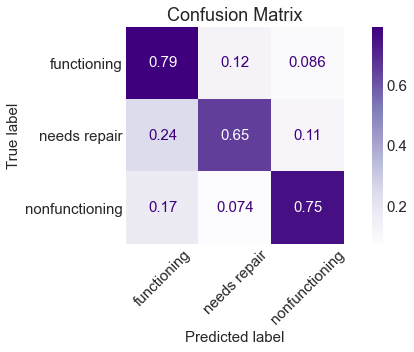

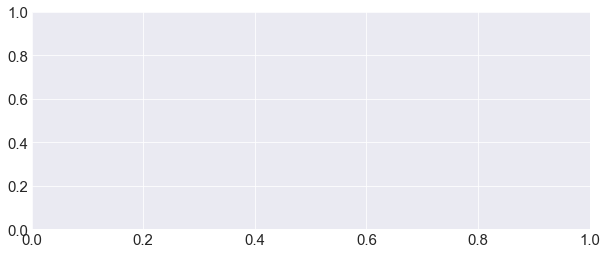

In [660]:
evaluate_clf_model(vclf_smote, X_train_tf, y_train_tf, 
                   X_test_tf, y_test_tf, 
                   label='Voting Class',
                   feature_importance=False)

> Voting Classifier Evaluation - SMOTE
    - It improved in recall for in need of repair wells but still not good

## Stacking Classifier

Even though there is `StackingClassifier` in sklearn package, we will manually create stracking classifier for we already have fitted all the models.

### Organizing Result of the 1st Layer

In [176]:
# Creates resuls of all the models for test and training set.
X_train_predict = {}
X_test_predict = {}

for model in model_dict:
    X_train_predict[model] = model_dict[model]['predict_train']
    X_test_predict[model] = model_dict[model]['predict_test']

X_train_predict = pd.DataFrame(X_train_predict)
X_test_predict = pd.DataFrame(X_test_predict)

Text(0.5, 1.0, 'Correlation Map Between the reulsts of different models')

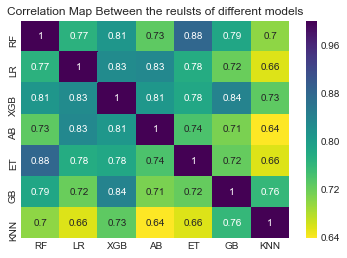

In [177]:
# Corrlation map between different models (Lower the better! - usually)
sns.heatmap(X_test_predict.corr(), cmap='viridis_r', annot=True)
plt.title('Correlation Map Between the reulsts of different models')

Low correlation between different models is preffered for they will provide different strengths to our stacking classifier.

### Modeling

In [156]:
# # Loads Data
# RF_1 = uc.load_data('files/best_recall_RF')

In [178]:
features_included = ['RF', 'ET', 'XGB', 'KNN']

from sklearn.ensemble import RandomForestClassifier
RF_1 = RandomForestClassifier(n_estimators= 1000,
                              max_depth= 5,
                              min_samples_split=0.01,
                              max_features=0.2,
                              class_weight=class_weight_dict)
RF_1.fit(X_train_predict[features_included], y_train_tf);

------------------------------------------------------------
[i] CLASSIFICATION REPORT Stacking Random Forest
------------------------------------------------------------
Train Accuracy :  0.7854
Test Accuracy :  0.7341
Train AUC :  0.9051
Test AUC :  0.8645
CV score (n=3) 0.767
------------------------------------------------------------

                precision    recall  f1-score   support

   functioning       0.86      0.72      0.78      8490
  needs repair       0.27      0.73      0.39      1019
nonfunctioning       0.81      0.76      0.78      6040

      accuracy                           0.73     15549
     macro avg       0.64      0.73      0.65     15549
  weighted avg       0.80      0.73      0.76     15549

------------------------------------------------------------




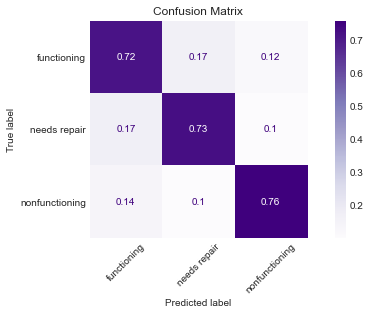

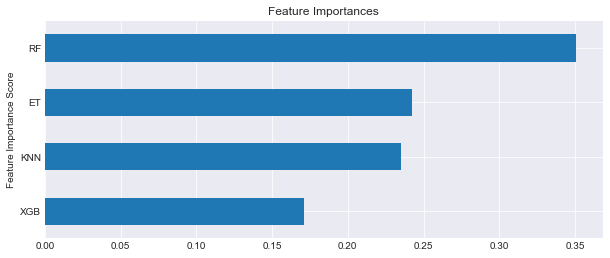

In [180]:
uc.evaluate_clf_model(RF_1, X_train_predict[features_included], y_train_tf, 
                   X_test_predict[features_included], y_test_tf, 
                   features=features_included,
                   label='Stacking Random Forest',
                   cv=3);

In [181]:
uc.save_data(RF_1, 'files/best_recall_RF')

## Creating Correlation Map

In [195]:
# Gets correlation matrix
df_corr = uc.get_corr(X_train_tf, y_train_tf)

In [197]:
df_corr

,functional,non functional,repair
gps_height,0.137775,-0.140898,-0.000400
longitude,0.012929,0.031875,-0.086821
latitude,0.004092,-0.025463,0.040935
population,0.009983,-0.015818,0.010763
construction_year,0.150061,-0.142289,-0.021937
...,...,...,...
waterpoint_type_group_hand pump,0.093140,-0.060104,-0.067906
waterpoint_type_group_improved spring,0.040629,-0.053149,0.022203
waterpoint_type_group_other,-0.281656,0.302179,-0.026388
wpt_name_False,0.108326,-0.082421,-0.054890


In [210]:
def get_feature_graph(df_corr, label='non functional', n_top=15, n_bottom=5):
    """
    From correlation matrix, graph top and bottom features.
    
    Args:
        df_corr (dataframe): Correlation matrix
        
        label (str): class name
        
        n_top (int): number of top features
        
        n_bottom (int): number of bottom features
    
    Returns:
        fig, ax : figure object
    """
    top_df = df_corr.sort_values(by='non functional', ascending=False).head(15)
    bottom_df = df_corr.sort_values(by='non functional', ascending=False).tail(6)
    
    comb_df = pd.concat([top_df, bottom_df], sort=True, axis=0)
    
    label = 'non functional'
    
    #  Graph
    fig, ax = plt.subplots(figsize=(15,10))
    color_choices = ['b']*np.sum(comb_df[label]>0) + ['r']*np.sum(comb_df[label]<0)
    comb_df[label].plot(kind='bar', ax=ax, color=color_choices, alpha=0.7)
                        
    ax.set(ylabel='Correlation', title=f'Correlations of Most Influencial Features for {label} Wells')
    plt.xticks(rotation=60, fontsize=12);
    
    return fig, ax

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Correlations of Most Influencial Features for non functional Wells'}, ylabel='Correlation'>)

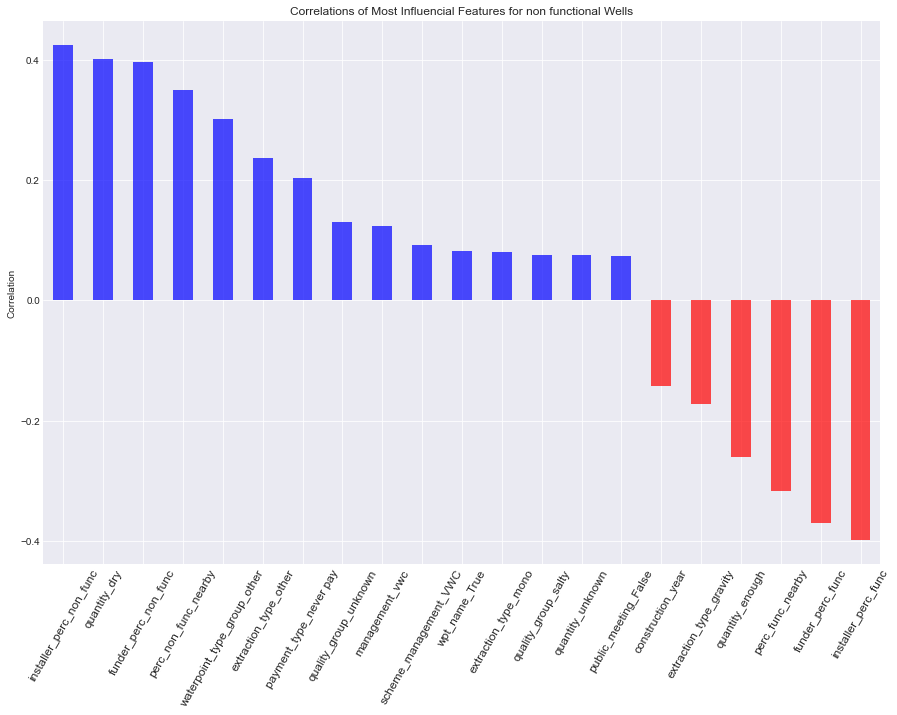

In [211]:
get_feature_graph(df_corr)

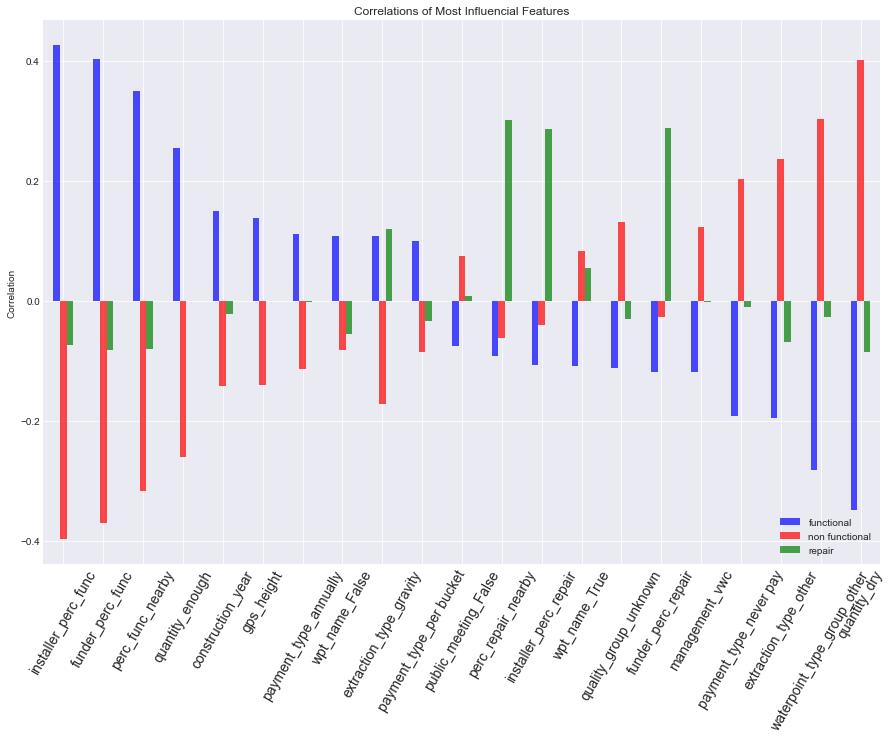

In [148]:
fig, ax = plt.subplots(figsize=(15,10))
# color_choices = ['b']*np.sum(df_func['functional']>0) + ['r']*np.sum(df_func['functional']<0)
df_func.plot(kind='bar', ax=ax, color=['b', 'r', 'g'], alpha=0.7)
ax.set(ylabel='Correlation', title='Correlations of Most Influencial Features')
plt.xticks(rotation=60, fontsize=14);

# Conclusion

## Model Summary

Type: Stack Classifier
    - 1st layer:
    - 2nd layer:
    
Metrics:
    - Accuracy (cv=3):
    - Effective Recalls:
        [1] Non-functioning = 
        [2] Functioning but need repairing =
        [3] Functioning = 


## Actionable Recommendations

The following features tend to be found in wells that are in need of repairing:
    
    
The following features tend to be found in wells that are functioning well:
    

## Future Direction

- Further hyperparameter tuning can be done for each model used
- Different combinations of ensemble models can be tested
- Different methods of dealing with class imbalance can be used
    - under sampling
    - different class weights
- Cost function for

        [1] wrongly identifying functioning wells as need repairing wells and
        [2] not being able to identify wells in need of repairing
    
  would improve the model to minimize both economical and sociological cost.


# Appendix

## Competition

### Best Accuracy Model

This model is purely for the competition

In [ ]:
# # Loads model
# final_ab = load_data('files/best_accuracy_AB')

In [132]:
features_included = ['RF',  'GB', 'KNN', 'ET', 'XGB', 'AB', 'LR']

In [135]:
from sklearn.ensemble import AdaBoostClassifier
final_ab = AdaBoostClassifier(n_estimators=5x00)
final_ab.fit(X_train_predictions[features_included], y_train_tf)


AdaBoostClassifier(n_estimators=1000)

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
Train Accuracy :  0.934
Test Accuracy :  0.8138
Train AUC :  0.9501
Test AUC :  0.8487
CV score (n=3) 0.8971
------------------------------------------------------------

                precision    recall  f1-score   support

   functioning       0.81      0.90      0.85      8490
  needs repair       0.53      0.30      0.38      1019
nonfunctioning       0.85      0.78      0.81      6040

      accuracy                           0.81     15549
     macro avg       0.73      0.66      0.68     15549
  weighted avg       0.81      0.81      0.81     15549

------------------------------------------------------------




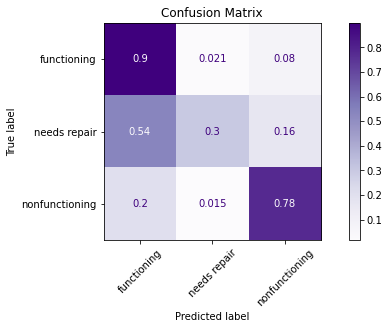

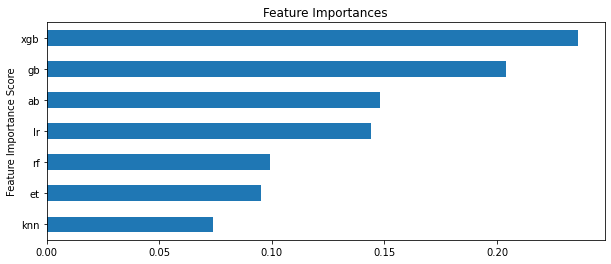

In [136]:
evaluate_clf_model(final_ab, X_train_predictions[features_included], y_train_tf, 
                   X_test_predictions[features_included], y_test_tf, 
                   features=features_included,
                   cv=3);

In [137]:
save_data(final_ab, 'files/best_accuracy_AB')

### Importing and processing Test Data

In [162]:
# Imports final testing data 
def import_test_data(drop_cols=None):
    X = pd.read_csv('datasets/Tanzanian/test_set.csv')
    
    X['date_recorded'] = pd.to_datetime(X['date_recorded'])
    X['year_recorded'] = X['date_recorded'].apply(lambda x: x.year)
    X['month_recorded'] = X['date_recorded'].apply(lambda x: x.month)
    X.drop(columns=['date_recorded'], axis=1, inplace=True)
    
    # 1 if a name exists and 0 if not.
    X['wpt_name'] = X['wpt_name']!='none'
    
    if drop_cols != None:
        X.drop(columns=drop_cols, axis=1, inplace=True)

    impute = SimpleImputer(strategy='most_frequent')
    X['permit'].fillna(True, inplace=True)
    X['public_meeting'].fillna(True, inplace=True)
    
    Xt=impute.fit_transform(X)
    Xt = pd.DataFrame(Xt, columns=X.columns)
    return Xt

In [150]:
Xt = import_test_data(cols_to_drop)

In [164]:
# y = df['status_group']

### Cleaning up
#### Distance Percentages

In [165]:
# Calculates percentage of functional, nonfunctional, and need repair wells within certain radius (30 km)
perc_func_near = []
perc_non_func_near = []
perc_repair_near = []

for index, row in Xt.iterrows():
#     print(index, row['latitude'], row['longitude'])
    wp = [row['latitude'], row['longitude']]
    wps = df[['latitude', 'longitude']].copy()
    
    d = get_distance(wp, wps)
    
    distance = 30
    indices = df[d < distance].index
    

    perc_func = round(np.sum(y.iloc[indices] == 'functional')/len(indices)*100, 2)
    perc_non_func = round(np.sum(y.iloc[indices] == 'non functional')/len(indices)*100, 2)
    perc_repair_func = round(np.sum(y.iloc[indices] == 'functional needs repair')/len(indices)*100, 2)
    
    perc_func_near.append(perc_func)
    perc_non_func_near.append(perc_non_func)
    perc_repair_near.append(perc_repair_func)

# Assigns percentages in appropriate columns
Xt['perc_func_nearby'] = perc_func_near
Xt['perc_non_func_nearby'] = perc_non_func_near
Xt['perc_repair_nearby'] = perc_repair_near

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


#### Extraction

In [166]:
# Extraction dictionary to simplify some of trivial ones as 'other'
extraction_dict = {'nira/tanira':'nira', 'swn 80':'other', 
                   'other - rope pump': 'other', 'other - swn 81': 'other',
                   'other - play pump': 'other', 'other - mkulima/shinyanga':'other',
                   'windmill': 'other', 'cemo':'other', 'climax':'other',
                   'walimi':'other', 'india mark iii':'other'}

# replaces insignificant extractor types as 'other'
Xt['extraction_type'] = Xt['extraction_type'].apply(lambda x: extraction_dict[x] if x in extraction_dict.keys() else x)

#### Installer and funder

In [169]:
installer_dict = load_data('files/installer_dict')
funder_dict = load_data('files/funder_dict')

In [170]:
def perc(data, col, perc_dict):
    data[f'{col}_perc_func'] = data[col].apply(lambda x: perc_dict[x][0] if x in perc_dict.keys() else np.NaN)
    data[f'{col}_perc_repair'] = data[col].apply(lambda x: perc_dict[x][1] if x in perc_dict.keys() else np.NaN)
    data[f'{col}_perc_non_func'] = data[col].apply(lambda x: perc_dict[x][2] if x in perc_dict.keys() else np.NaN)
    
    data.drop(columns=col, axis=1, inplace=True)

In [171]:
perc(Xt, 'installer', installer_dict)
perc(Xt, 'funder', funder_dict)

#### Replaces 0, 0 lat, long into mean lat and long

In [177]:
# calculates mean latitude and longitude
mean_lat = Xt['latitude'].mean()
mean_long = Xt['longitude'].mean()
print(mean_lat, mean_long)

-5.859668540209812 35.10983104179061


In [178]:
# Replaces the 0 values or near 0 values to mean
Xt['latitude'] = Xt['latitude'].apply(lambda x: mean_lat if x >-0.1 else x)
Xt['longitude'] = Xt['longitude'].apply(lambda x: mean_long if x <1 else x)

#### Preprocessing

In [179]:
# Uses pipeline used in creating layer 1 models
Xt_tf = preprocessing2.transform(Xt)
feature_names = preprocessing2.named_transformers_['cat'].\
                named_steps['encoder'].get_feature_names(cat_cols).tolist()
feature_names

features = num_cols + feature_names

Xt_tf = pd.DataFrame(Xt_tf, columns = features)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [180]:
# Saves the file
save_data(Xt_tf, 'files/processed_comp_data')

### 1 layer

In [ ]:
# Loads data
# Xt_tf = load_data('files/processed_comp_data')

In [181]:
# Getting predictions of X_train
train = Xt_tf
y_rf_train = RF.predict(train)
y_ab_train = AB.predict(train)
y_lr_train = LR.predict(train)
y_et_train = ET.predict(train)
y_gb_train = GB.predict(train)


Xt_predictions = pd.DataFrame({'rf': y_rf_train,
                                    'ab': y_ab_train,
                                    'lr': y_lr_train,
                                    'et': y_et_train,
                                    'gb': y_gb_train})


### 2nd layer

In [ ]:
final_pred_acc = RF_1.predict(Xt_predictions[features_included])
final_pred_acc

In [ ]:
final_pred_acc2 = final_ab.predict(Xt_predictions[features_included])
final_pred_acc2

### Voting model

In [514]:
final_pred_voting = vclf.predict(Xt_tf)

### Making submission file

In [219]:
final = pd.read_csv('datasets/Tanzanian/SubmissionFormat.csv')

In [220]:
def make_final(final, final_pred):
    final['status_group'] = final_pred
    status_group_dict = {0:'functional', 1:'functional needs repair', 2:'non functional'}
    final['status_group']=final['status_group'].apply(lambda x: status_group_dict[x])
    return final

In [515]:
final = make_final(final, final_pred_voting)
final['status_group'].value_counts(normalize=True)

functional                 0.626128
non functional             0.335623
functional needs repair    0.038249
Name: status_group, dtype: float64

In [221]:
final = make_final(final, final_pred_LR_2)
final['status_group'].value_counts(normalize=True)

functional                 0.612727
non functional             0.373199
functional needs repair    0.014074
Name: status_group, dtype: float64

In [516]:
final.to_csv(r'submissions/final_submission_voting2.csv', index = False)

## Visual Aids

In [215]:
X = pd.read_csv('datasets/Tanzanian/training_set.csv')
y = pd.read_csv('datasets/Tanzanian/train_result.csv')
df = pd.concat([X, y], axis=1)

### Using plotly express

In [216]:
with open('datasets/Tanzanian/TZ_state_1.geojson', 'r') as f:
    tz_states = json.load(f)

In [217]:
state_id_map = {}
for feature in tz_states['features']:
    feature['id'] = feature['properties']['ID_1']
    state_id_map[feature['properties']['NAME_1']] = feature['id']
state_id_map['Dar es Salaam'] = 2
state_id_map.pop('Dar-Es-Salaam')

2

In [218]:
df['region_id'] = df['region'].apply(lambda x: state_id_map[x])

In [221]:
df_region = pd.DataFrame(dict(id=list(state_id_map.values()),region = list(state_id_map.keys())))

In [222]:
total_nums = []
total_func = []
total_repair = []
total_non_func = []

main_source = []
main_source_perc = []

quantity = []
quantity_perc = []

for region in df_region['region']:
    df_copy = df[df['region']==region].copy()
    if df_copy.shape[0] != 0:
        total_num = df_copy.shape[0]
        # Total number of wells installed in the region
        total_nums.append(total_num)

        # Total number of wells that are functions, non functional, and needs repair
        total_func.append((df_copy['status_group'] == 'functional').sum())
        total_non_func.append((df_copy['status_group'] == 'non functional').sum())
        total_repair.append((df_copy['status_group'] == 'functional needs repair').sum())

        # main water source
        try:
            main_source.append(df_copy['source_class'].value_counts(normalize=True).index[0])
            main_source_perc.append(df_copy['source_class'].value_counts(normalize=True)[0])
        except:
            print(region)

        # water quantity
        quantity.append(df_copy['quantity'].value_counts(normalize=True).index[0])
        quantity_perc.append(df_copy['quantity'].value_counts(normalize=True)[0])
    else:
        total_nums.append(0)
        total_func.append(0)
        total_non_func.append(0)
        total_repair.append(0)
        
        main_source.append(0)
        main_source_perc.append(0)
        
        quantity.append(0)
        quantity_perc.append(0)

        

In [223]:
df_region['total_nums'] = total_nums
df_region['total_func'] = total_func
df_region['total_repair'] = total_repair
df_region['total_non_func'] = total_non_func

df_region['main_source'] = main_source
df_region['main_source_perc'] = main_source_perc

df_region['quantity'] = quantity
df_region['quantity_perc'] = quantity_perc

In [224]:
df_region['func_perc']=round(df_region['total_func']/df_region['total_nums']*100,2)
df_region['non_func_perc']=round(df_region['total_non_func']/df_region['total_nums']*100,2)
df_region['repair_perc']=round(df_region['total_repair']/df_region['total_nums']*100,2)


In [225]:
df_region.dropna()

,id,region,total_nums,total_func,total_repair,total_non_func,main_source,main_source_perc,quantity,quantity_perc,func_perc,non_func_perc,repair_perc
0,1,Arusha,3350,2294,175,881,groundwater,0.683582,insufficient,0.522687,68.48,26.30,5.22
1,3,Dodoma,2201,1009,209,983,groundwater,0.962744,enough,0.484780,45.84,44.66,9.50
2,4,Iringa,5294,4141,123,1030,groundwater,0.773706,enough,0.824518,78.22,19.46,2.32
3,5,Kagera,3316,1727,304,1285,groundwater,0.842280,enough,0.581122,52.08,38.75,9.17
6,8,Kigoma,2816,1363,603,850,surface,0.512074,enough,0.670099,48.40,30.18,21.41
7,9,Kilimanjaro,4379,2640,322,1417,groundwater,0.870290,enough,0.590089,60.29,32.36,7.35
9,11,Lindi,1546,460,93,993,groundwater,0.855757,enough,0.495472,29.75,64.23,6.02
10,12,Manyara,1583,987,96,500,groundwater,0.772584,enough,0.620973,62.35,31.59,6.06
11,13,Mara,1969,886,60,1023,groundwater,0.689690,enough,0.657694,45.00,51.96,3.05
12,14,Mbeya,4639,2319,504,1816,groundwater,0.680966,enough,0.483078,49.99,39.15,10.86


In [226]:
from ipywidgets import interact

In [227]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'

In [229]:
# Shows a plotly express graph with feature of your choice!
@interact(color=df_region.keys())
def plot_choropleth(color):
    fig = px.choropleth(df_region, locations='id', 
                  geojson=tz_states, 
                  hover_name = 'region',
                  hover_data = ['func_perc', 'non_func_perc', 'repair_perc', 'total_nums'],
                  scope='africa',
                  color=color,
                  width = 800,
                  height= 800)
    fig.show()

In [233]:
df_region.sort_values(by='non_func_perc', ascending=False)[['region', 'non_func_perc']]

,region,non_func_perc
9,Lindi,64.23
14,Mtwara,62.43
21,Tabora,54.42
17,Rukwa,53.43
11,Mara,51.96
15,Mwanza,45.68
20,Singida,45.58
1,Dodoma,44.66
25,Dar es Salaam,42.36
22,Tanga,40.75


In [234]:
df_region.sort_values(by='repair_perc', ascending=False)[['region', 'repair_perc']]

,region,repair_perc
6,Kigoma,21.41
19,Shinyanga,12.75
12,Mbeya,10.86
1,Dodoma,9.50
3,Kagera,9.17
13,Morogoro,7.49
17,Rukwa,7.47
7,Kilimanjaro,7.35
14,Mtwara,7.28
18,Ruvuma,6.21


### Cumulative Number of Wells 

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



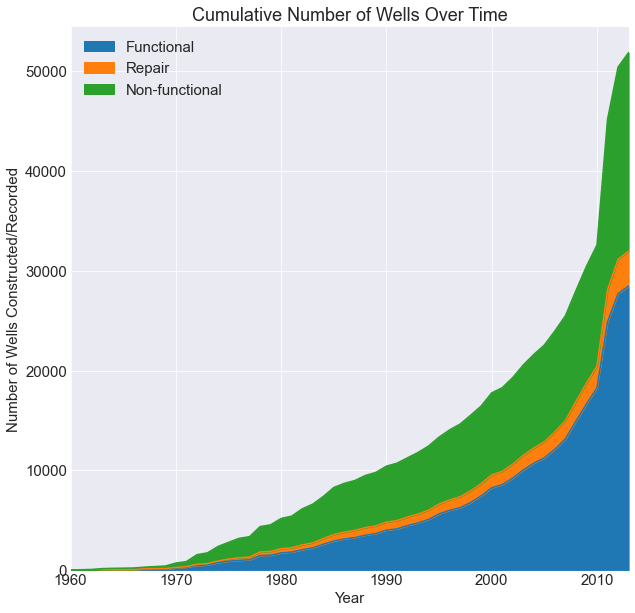

In [242]:
df = uc.load_data('files/final_df')
df = pd.concat([df, pd.get_dummies(df['status_group'])], axis=1)
# Changes 0 to recorded year for construction year
mask = df['construction_year'] == 0
df['construction_year'][mask] = df['year_recorded'][mask]

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 15})
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(10,10))
cum_sum = pd.DataFrame({'Functional': df.groupby('construction_year').sum()['functional'].cumsum(),
                        'Repair': df.groupby('construction_year').sum()['functional needs repair'].cumsum(),
                        'Non-functional': df.groupby('construction_year').sum()['non functional'].cumsum()},
                       index=df.groupby('construction_year').sum().index)

cum_sum.plot.area(ax=ax)

# ax = df.groupby('construction_year').count()['status_group'].cumsum().plot(figsize=(10,10))
# df.groupby('construction_year').sum()['functional'].cumsum().plot(figsize=(10,10), c='r', label='Functional Wells')
ax.set(xlabel="Year", ylabel="Number of Wells Constructed/Recorded", title='Cumulative Number of Wells Over Time');
plt.legend()

### Functionality by quantity

In [244]:
df2 = df.groupby('quantity').sum()[['functional', 'functional needs repair', 'non functional']]

df2_sums = df2.sum(axis=1)

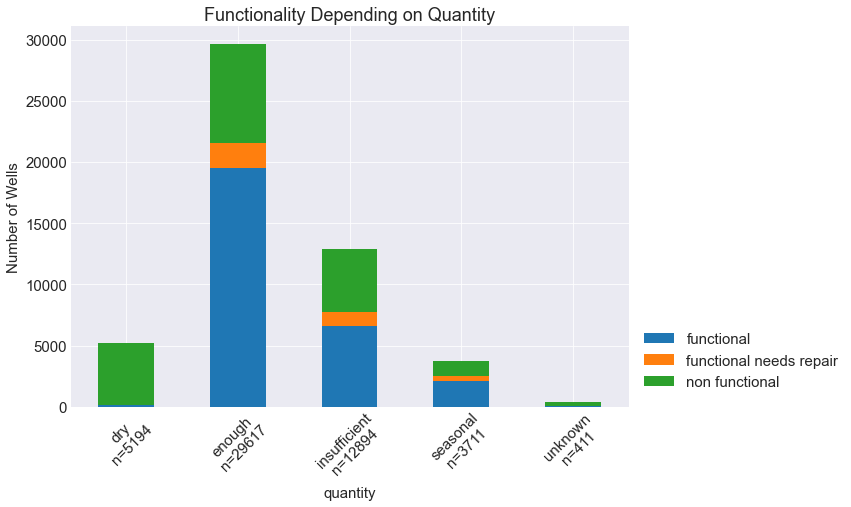

In [245]:
fig, ax = plt.subplots(figsize=(10,7))
df2.plot(kind='bar', stacked=True, ax=ax)
ax.set(ylabel='Number of Wells', title='Functionality Depending on Quantity')
# ax.set_xticklabels(years, rotation=65)
ax.set_xticklabels([x + f'\nn={int(df2_sums[i])}' for i, x in enumerate(['dry', 'enough', 'insufficient', 'seasonal', 'unknown'])], rotation=45)
plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0.01))

In [246]:
# normalizes the data
for i, col in enumerate(df2.columns):
    df2[col] = df2[col] / df2_sums
df2

,functional,functional needs repair,non functional
quantity,,,
dry,0.025992,0.003080,0.970928
enough,0.658507,0.068103,0.273390
insufficient,0.512719,0.085156,0.402125
seasonal,0.572083,0.098626,0.329291
unknown,0.192214,0.007299,0.800487


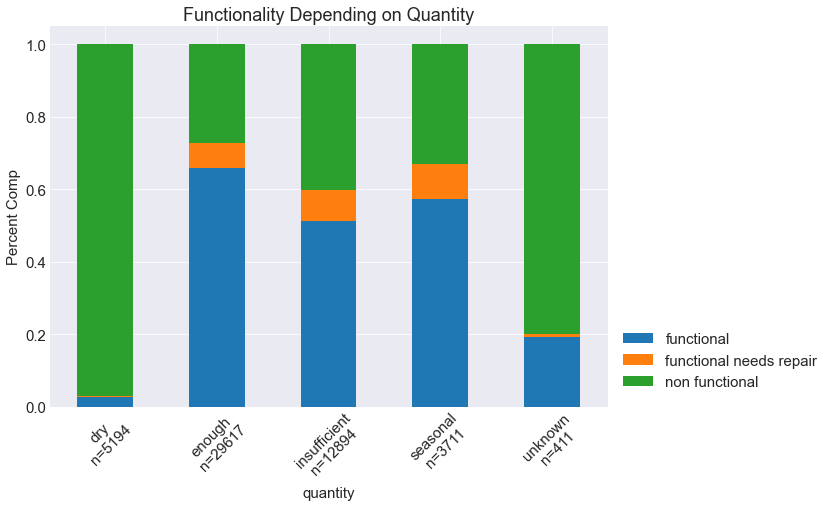

In [247]:
fig, ax = plt.subplots(figsize=(10,7))
df2.plot(kind='bar', stacked=True, ax=ax)
ax.set(ylabel='Percent Comp', title='Functionality Depending on Quantity')
# ax.set_xticklabels(years, rotation=65)
ax.set_xticklabels([x + f'\nn={int(df2_sums[i])}' for i, x in enumerate(['dry', 'enough', 'insufficient', 'seasonal', 'unknown'])], rotation=45)
plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0.01))


### Functionality depending on Funder

In [253]:
# Reset data
X = pd.read_csv('datasets/Tanzanian/training_set.csv')
y = pd.read_csv('datasets/Tanzanian/train_result.csv')
df = pd.concat([X, y], axis=1)
df = pd.concat([df, pd.get_dummies(df['status_group'])], axis=1)

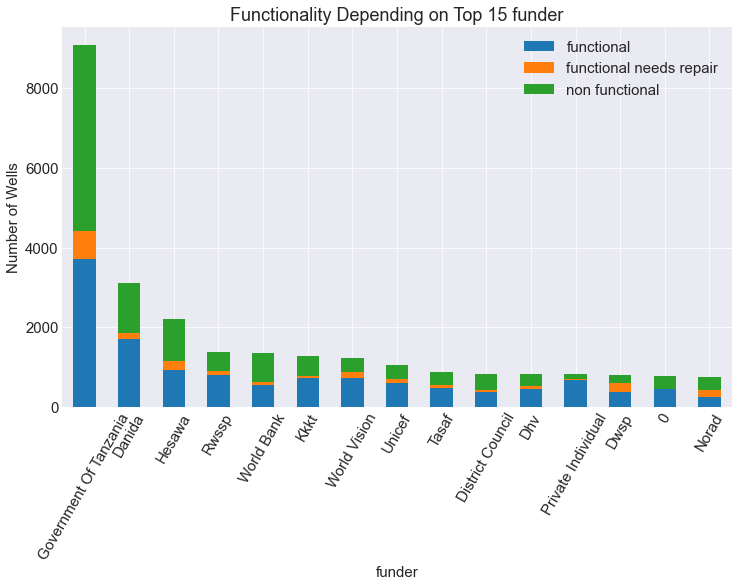

In [289]:
label = 'funder'
df2 = df.groupby(label).sum()[['functional', 'functional needs repair', 'non functional']]
df2['total'] = df2.sum(axis=1)
df2 = df2.sort_values(by='total', ascending=False)

fig, ax = plt.subplots(figsize=(12,7))
df2.drop(columns='total').iloc[:15,:].plot(kind='bar', stacked=True, ax=ax)
ax.set(ylabel='Number of Wells', title=f'Functionality Depending on Top 15 {label}')
plt.xticks(rotation=60);

In [265]:
# Normalizes the data
for i, col in enumerate(df2.columns):
    df2[col] = df2[col] / df2_sums
df2.sort_values(by='non functional', ascending=False)

,functional,functional needs repair,non functional,total
funder,,,,
Iom,0.000000,0.000000,1.0,NaN
Quickwins,0.000000,0.000000,1.0,NaN
Bkhws,0.000000,0.000000,1.0,NaN
Piscope,0.000000,0.000000,1.0,NaN
Pius Msekwa,0.000000,0.000000,1.0,NaN
...,...,...,...,...
Dar Es Salaam Round Table,1.000000,0.000000,0.0,NaN
Dar Al Ber,0.062222,0.004444,0.0,NaN
Ndolezi,1.000000,0.000000,0.0,NaN


### Installer

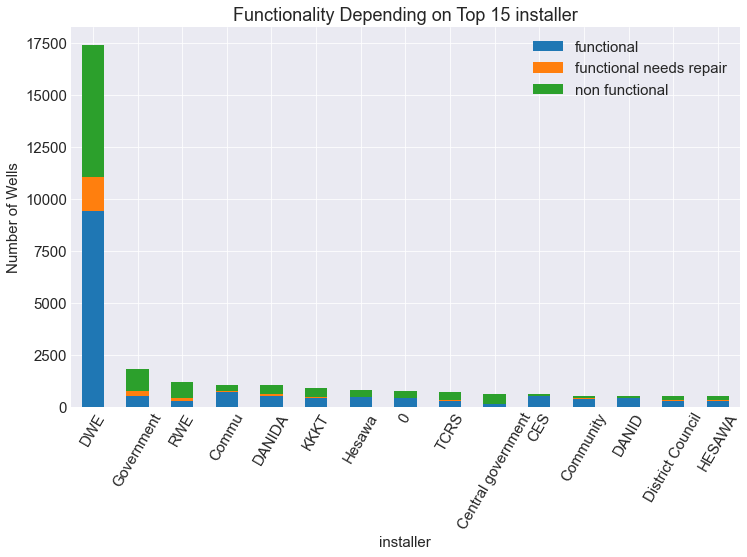

In [298]:
label = 'installer'
df2 = df.groupby(label).sum()[['functional', 'functional needs repair', 'non functional']]
df2['total'] = df2.sum(axis=1)
df2 = df2.sort_values(by='total', ascending=False)

fig, ax = plt.subplots(figsize=(12,7))
df2.drop(columns='total').iloc[:15,:].plot(kind='bar', stacked=True, ax=ax)
ax.set(ylabel='Number of Wells', title=f'Functionality Depending on Top 15 {label}')
plt.xticks(rotation=60);

In [299]:
df2

,functional,functional needs repair,non functional,total
installer,,,,
DWE,9433.0,1622.0,6347.0,17402.0
Government,535.0,256.0,1034.0,1825.0
RWE,304.0,137.0,765.0,1206.0
Commu,724.0,32.0,304.0,1060.0
DANIDA,542.0,83.0,425.0,1050.0
...,...,...,...,...
MH Kapuya,0.0,0.0,1.0,1.0
METHODIST CHURCH,1.0,0.0,0.0,1.0
MECO,0.0,0.0,1.0,1.0


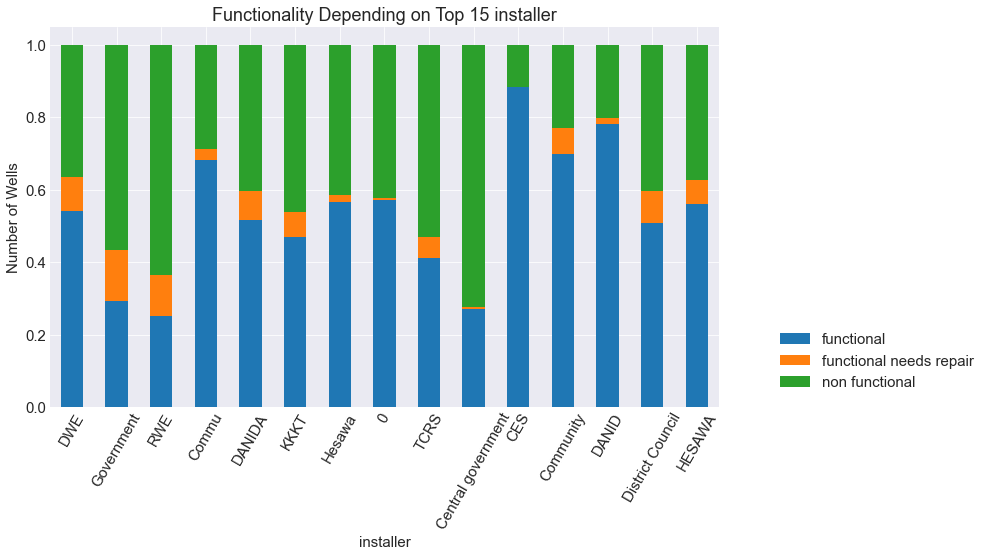

In [302]:
# Normalizes the data
for col in df2.columns:
    df2[col] = df2[col] / df2['total']
fig, ax = plt.subplots(figsize=(12,7))
df2.drop(columns='total').iloc[:15,:].plot(kind='bar', stacked=True, ax=ax)
ax.set(ylabel='Number of Wells', title=f'Functionality Depending on Top 15 {label}')
plt.xticks(rotation=60);
plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0.01))

### Extractor

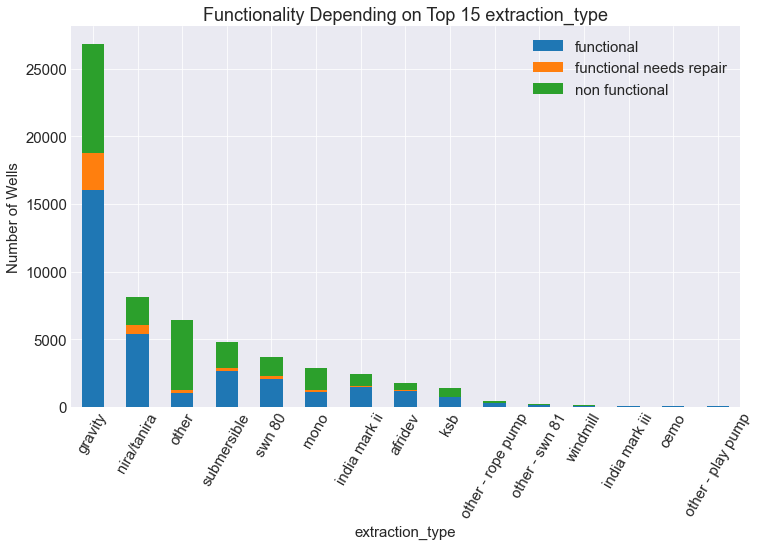

In [303]:
label = 'extraction_type'
df2 = df.groupby(label).sum()[['functional', 'functional needs repair', 'non functional']]
df2['total'] = df2.sum(axis=1)
df2 = df2.sort_values(by='total', ascending=False)

fig, ax = plt.subplots(figsize=(12,7))
df2.drop(columns='total').iloc[:15,:].plot(kind='bar', stacked=True, ax=ax)
ax.set(ylabel='Number of Wells', title=f'Functionality Depending on Top 15 {label}')
plt.xticks(rotation=60);

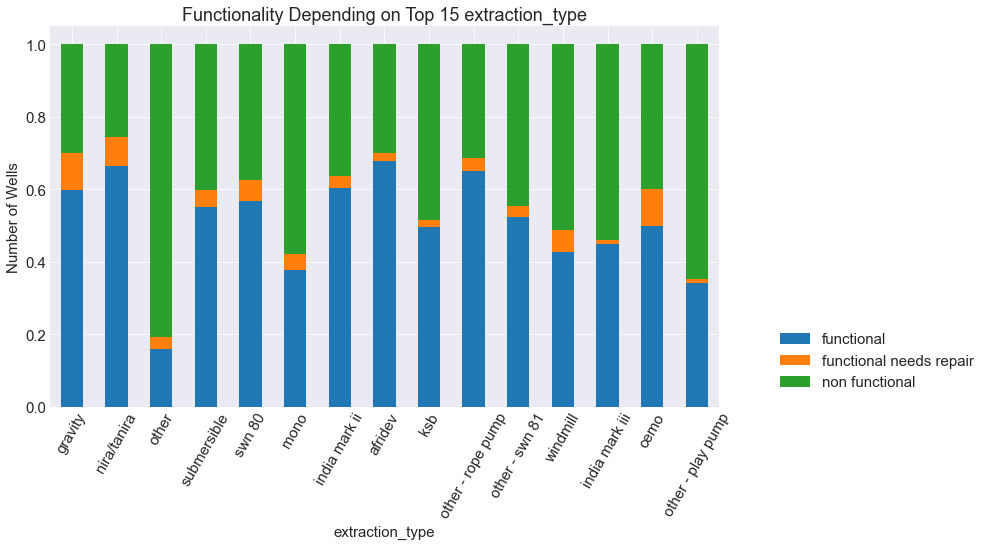

In [304]:
# Normalizes the data
for col in df2.columns:
    df2[col] = df2[col] / df2['total']
fig, ax = plt.subplots(figsize=(12,7))
df2.drop(columns='total').iloc[:15,:].plot(kind='bar', stacked=True, ax=ax)
ax.set(ylabel='Number of Wells', title=f'Functionality Depending on Top 15 {label}')
plt.xticks(rotation=60);
plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0.01))